In [ ]:
"""
In this notebook, some analyses are done on the result of FCT and SFCT.
The instances are assumed to have similar distributions. 
All instances are considered stochastic.
"""

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import skewnorm
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df0 = pd.read_csv('FCT_simulation.csv')
df0.columns=['i','j',0]
df0 = df0.sort_values(['i', 'j'])
df0 = df0.reset_index(drop=True)
df = pd.read_csv('SFCT_simulation.csv')
df.columns=['i', 'j', 'r', 0]
df = df.sort_values(['i','j', 'r'])
df = df.reset_index(drop=True)

In [3]:
tmp = df0[['i','j']]
ind = []
for row in range(len(df0)):
    ind.append((tmp.iloc[row]['i'], tmp.iloc[row]['j']))
ind = sorted(list(set(ind)))
    
d0 = {}
for i,j in ind:
    d0[i,j] = list(df0[(df0['i']==i)&(df0['j']==j)][0])[0]

In [4]:
tmp = df[['i','j']]
ind = []
for row in range(len(df)):
    ind.append((tmp.iloc[row]['i'], tmp.iloc[row]['j']))
ind = sorted(list(set(ind)))

d = {}
for i,j in ind:
    tmp = df[(df['i']==i)&(df['j']==j)][0]
    d[i,j] = np.array([float(i) for i in tmp if i != 'FALSE'])

In [7]:
s0 = set(d0.keys())
s = set(d.keys())
print(s0-s, len(s0))
print(s-s0, len(s))

set() 242
set() 242


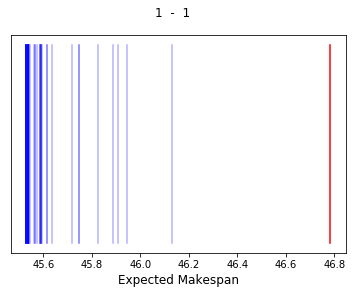

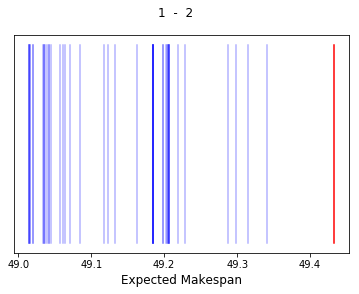

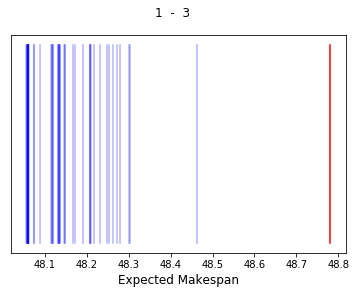

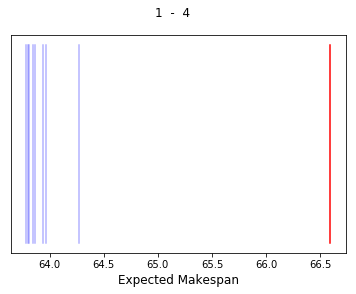

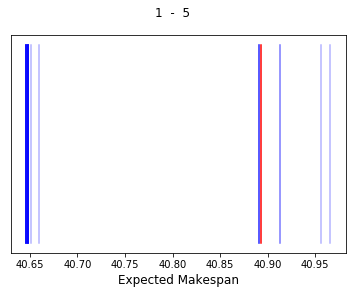

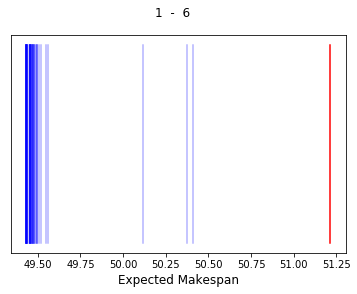

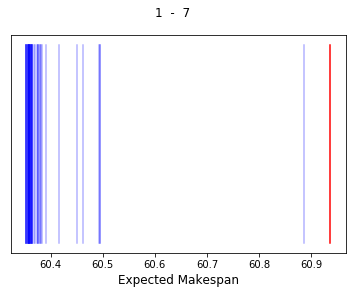

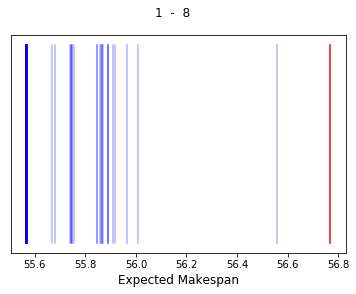

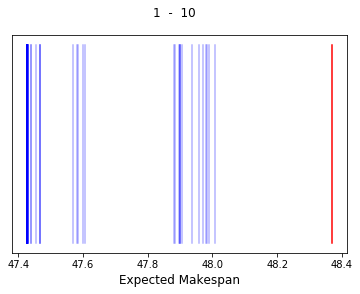

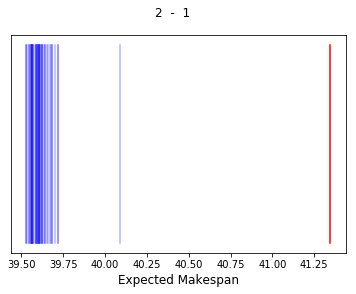

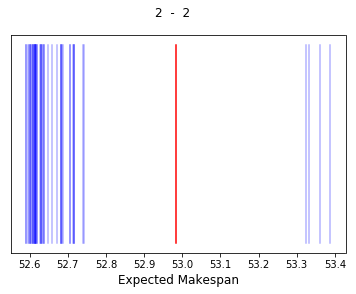

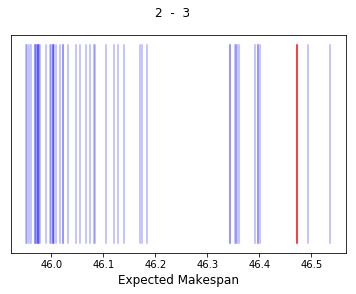

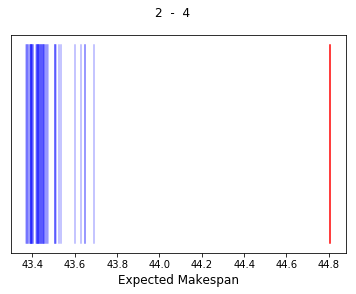

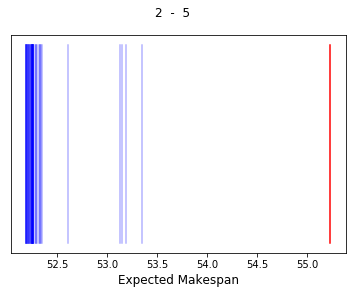

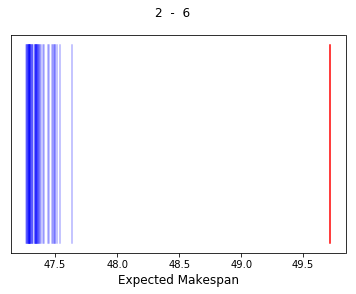

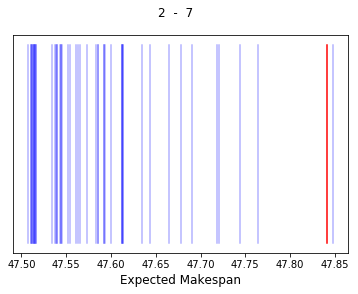

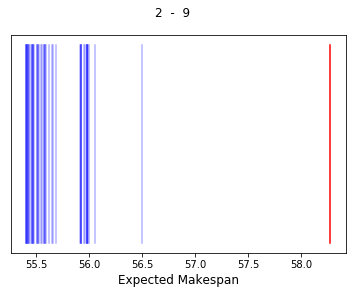

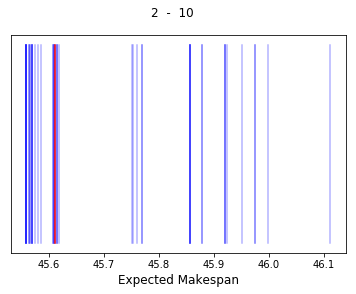

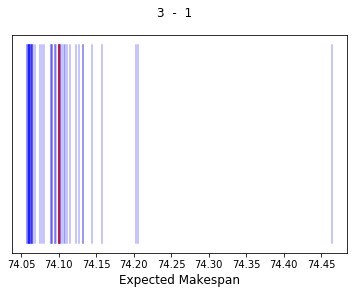

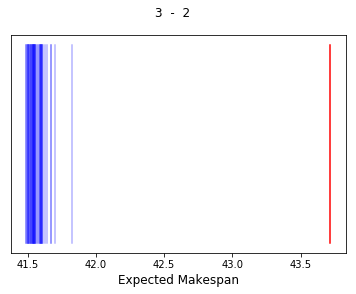

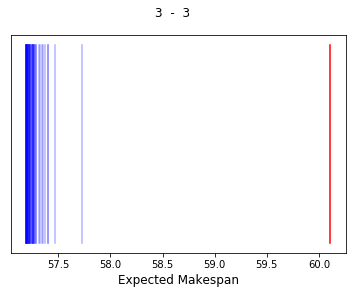

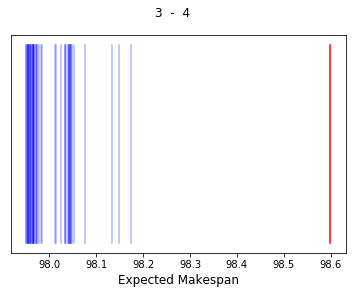

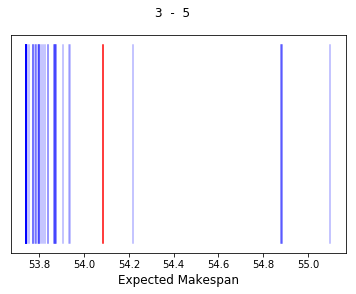

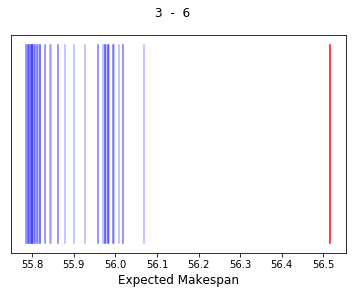

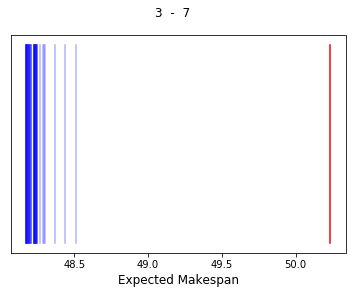

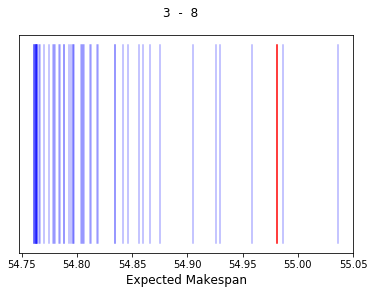

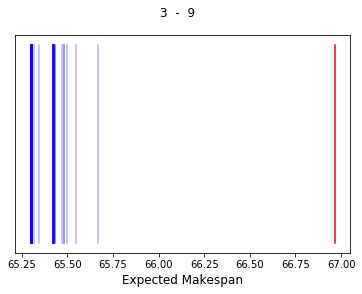

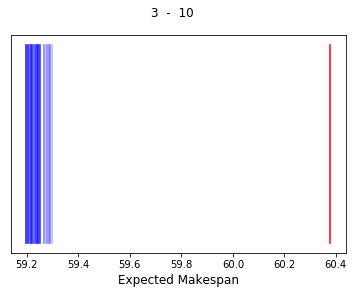

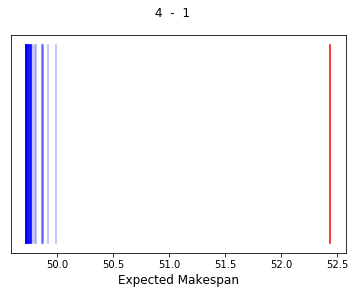

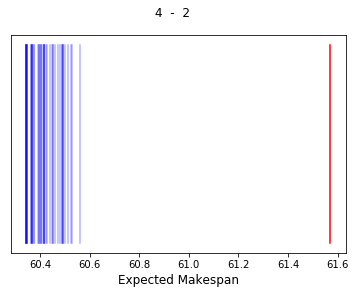

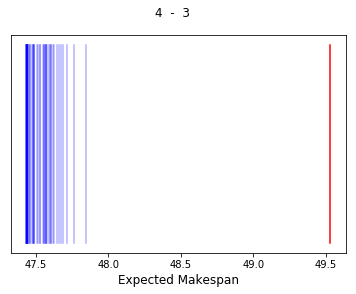

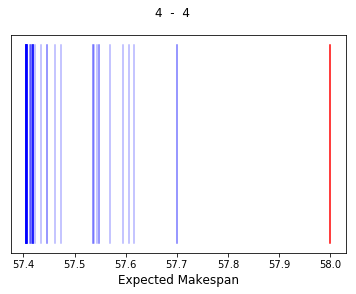

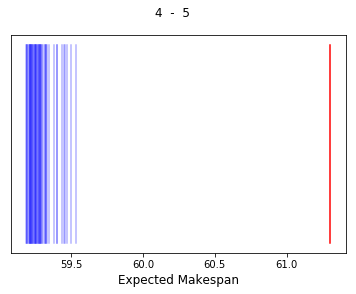

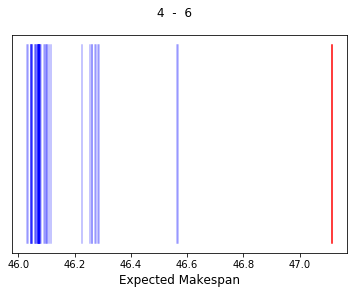

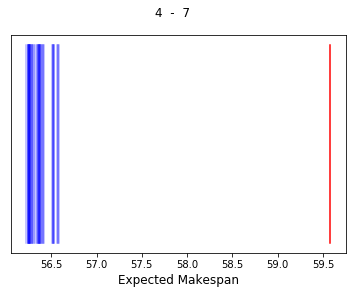

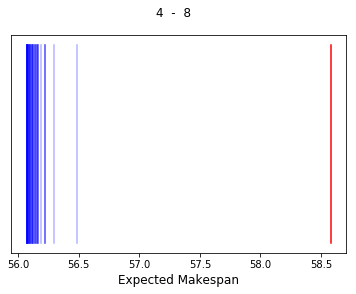

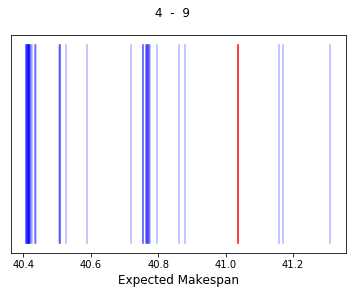

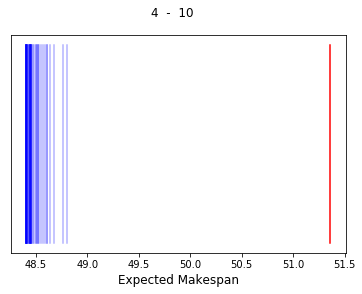

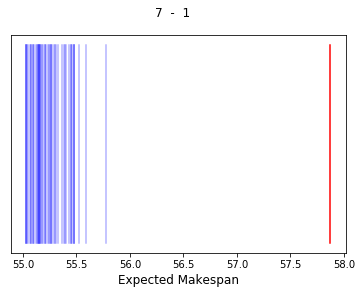

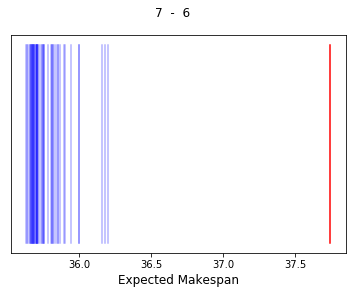

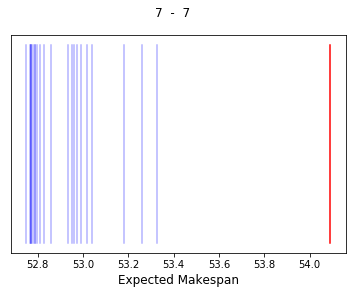

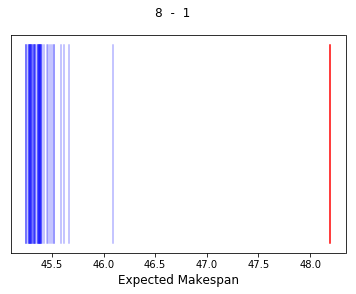

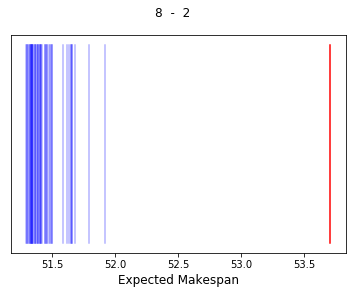

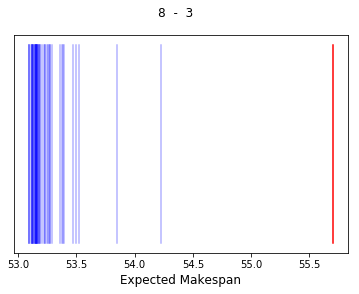

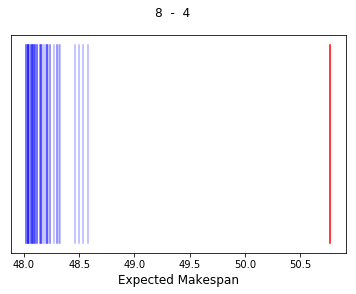

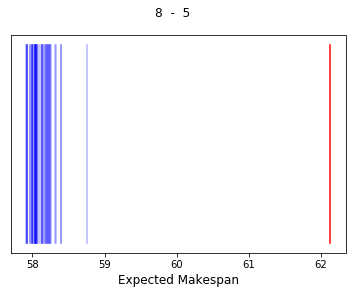

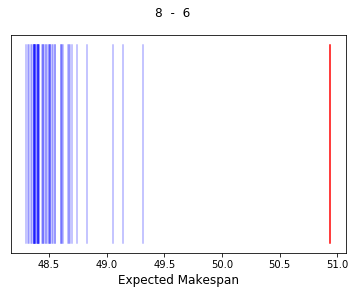

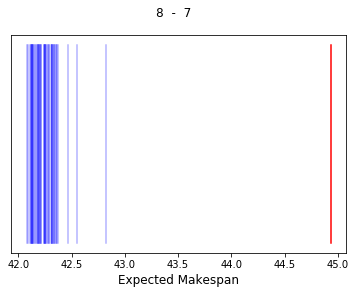

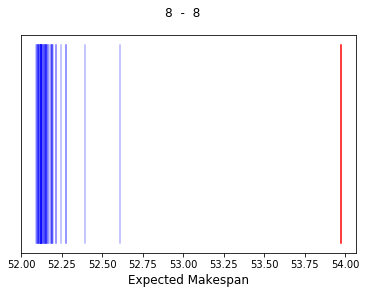

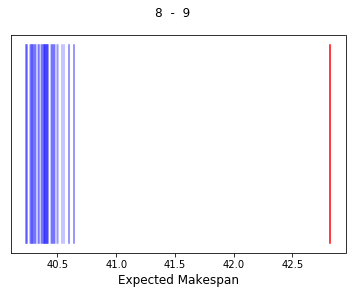

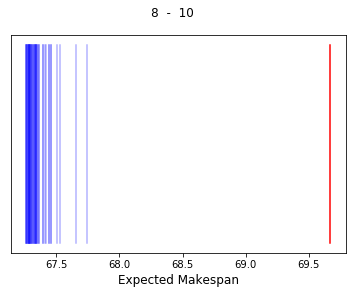

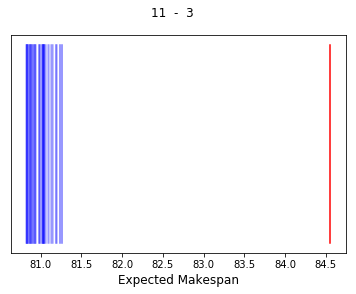

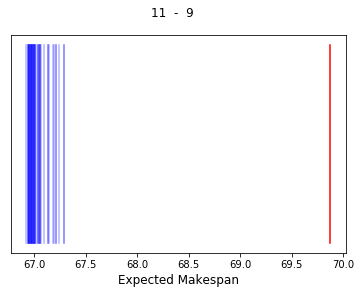

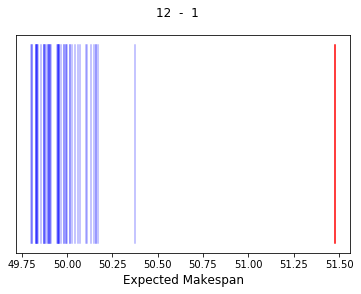

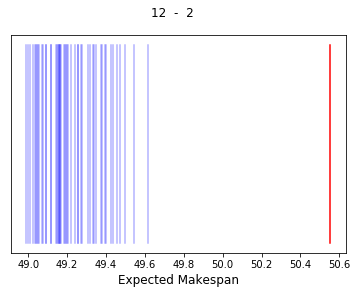

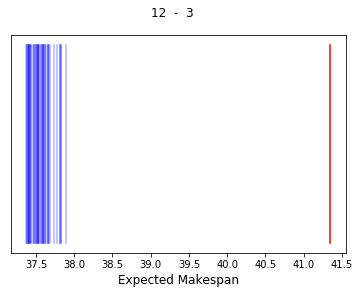

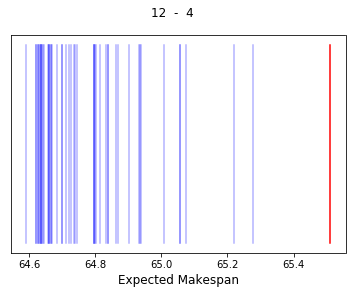

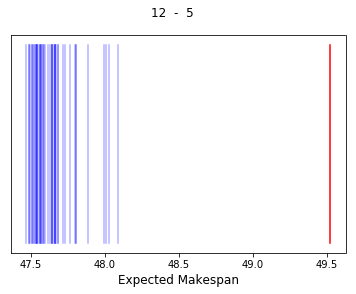

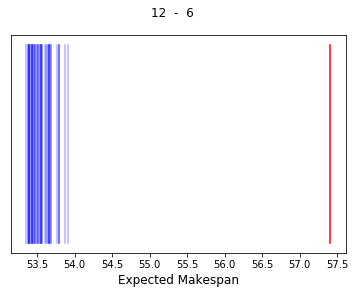

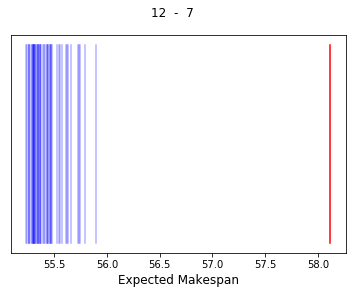

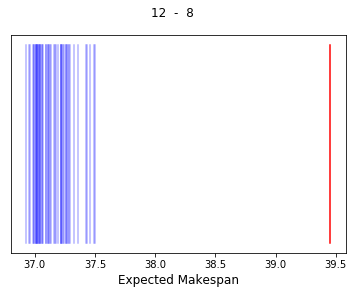

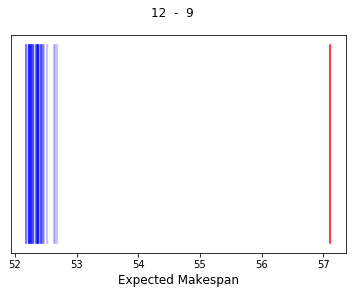

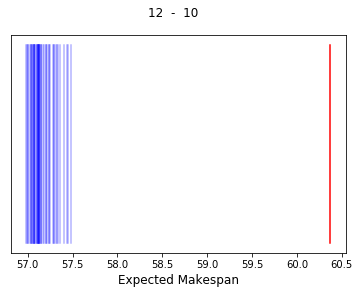

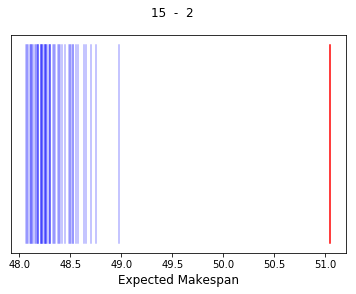

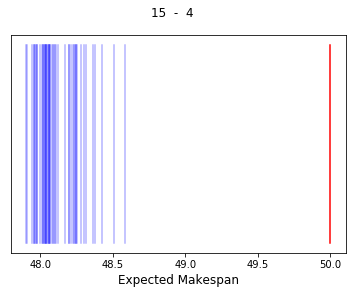

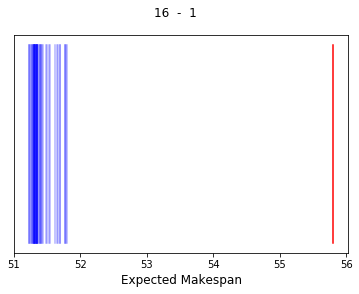

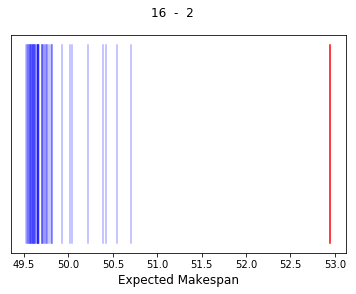

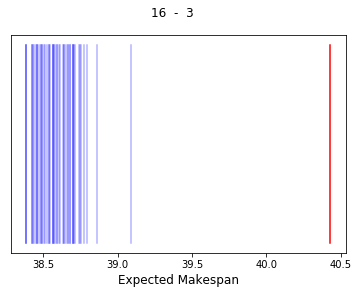

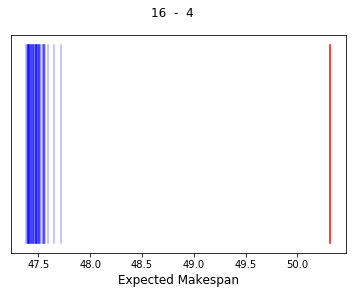

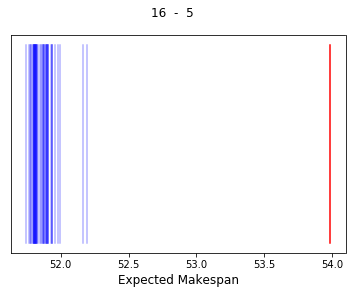

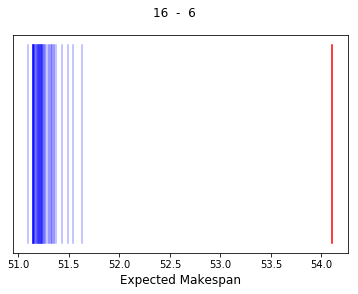

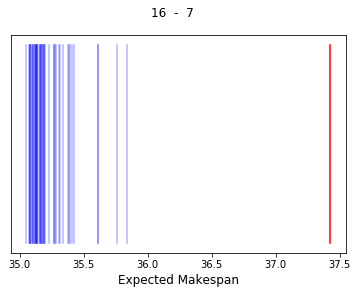

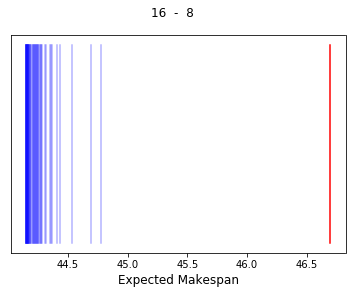

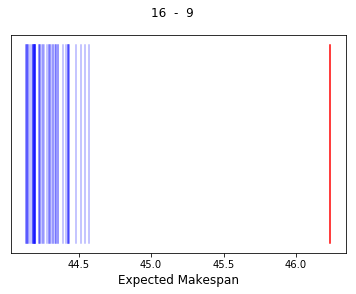

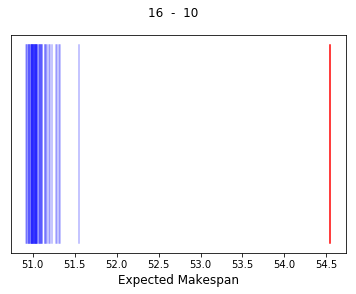

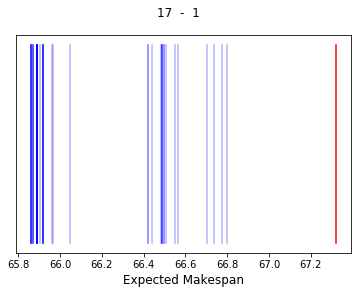

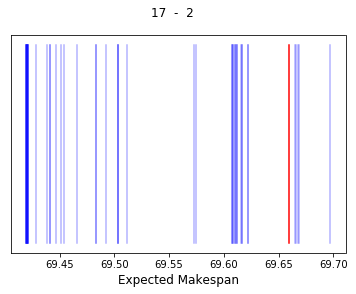

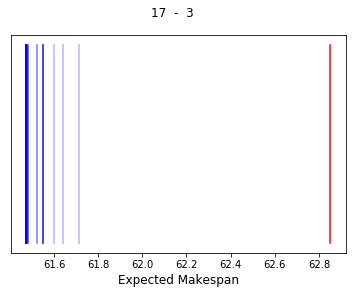

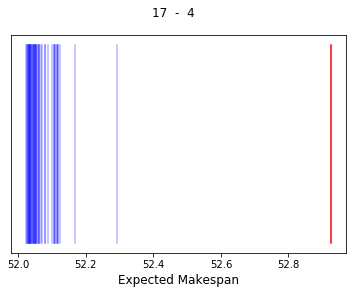

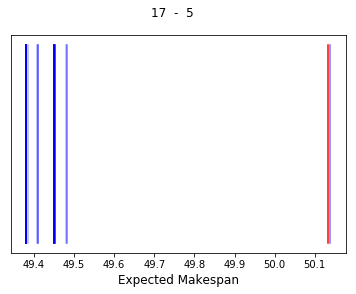

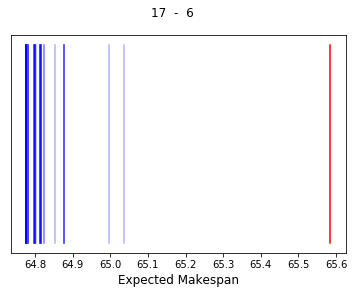

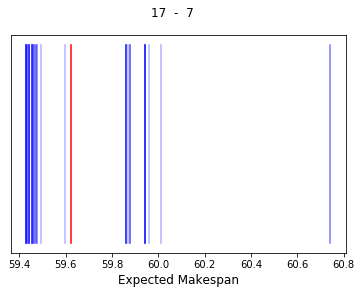

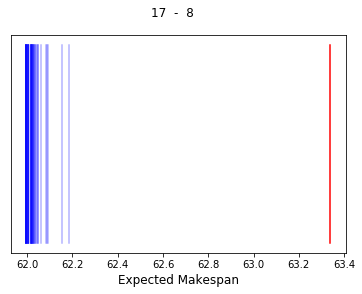

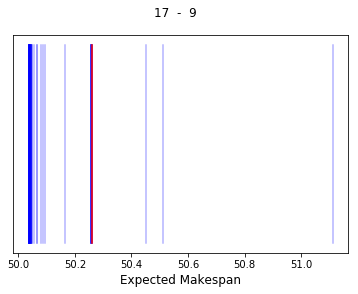

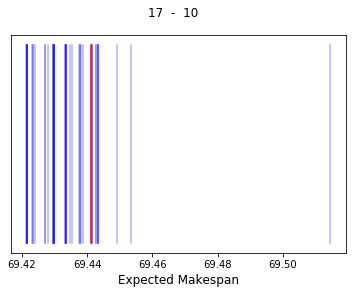

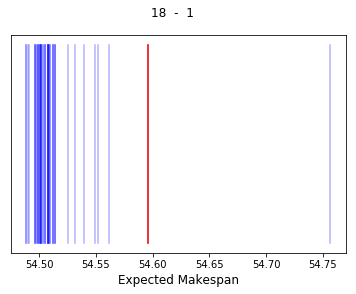

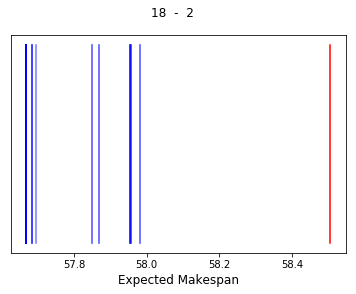

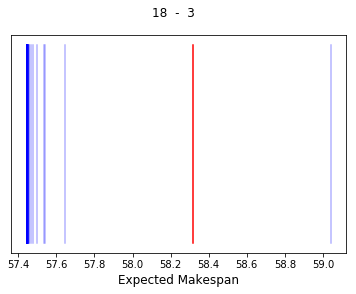

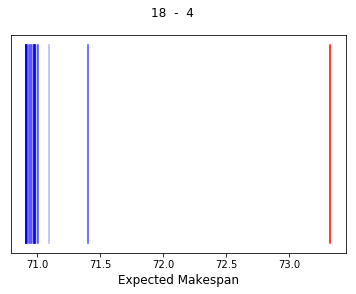

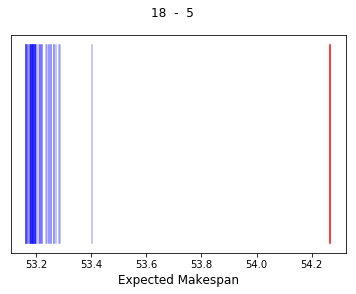

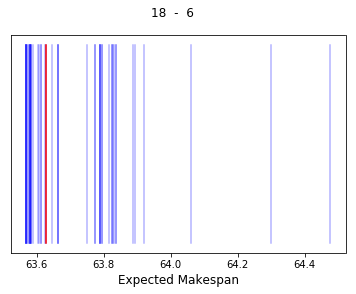

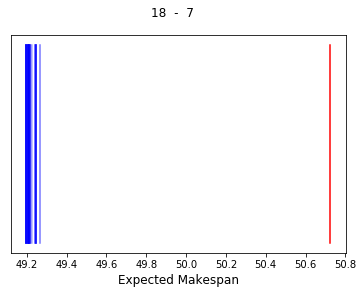

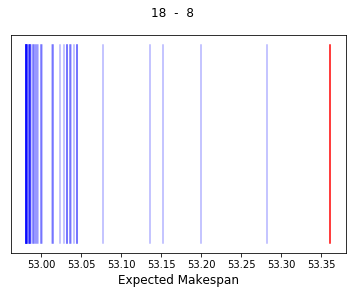

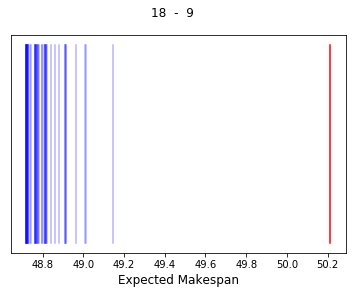

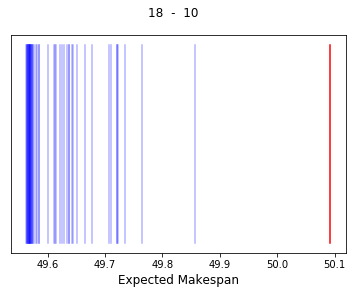

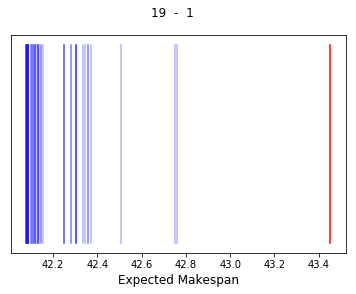

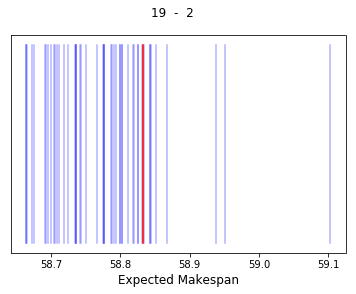

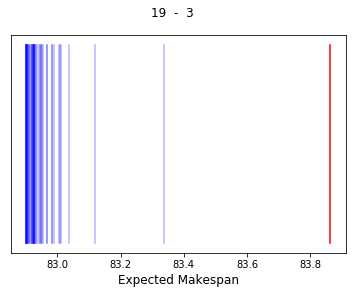

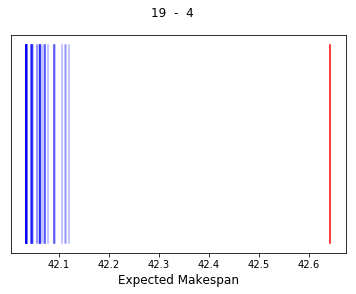

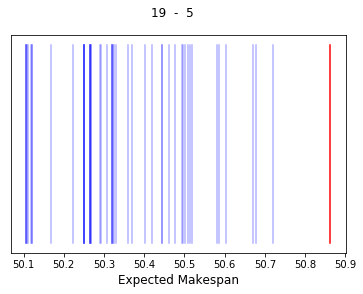

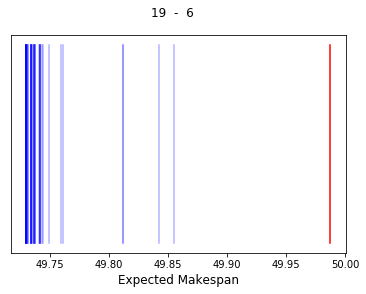

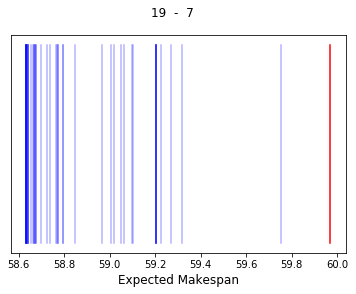

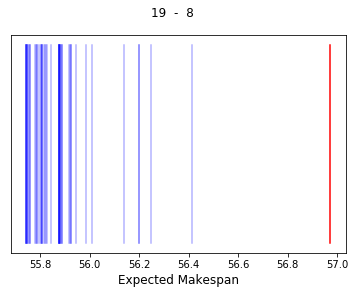

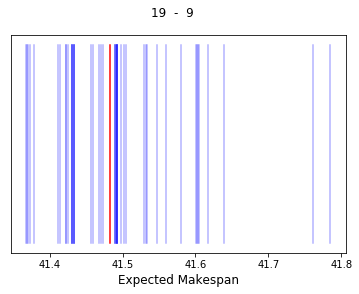

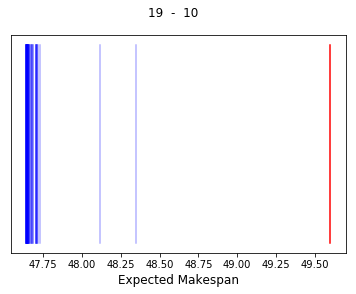

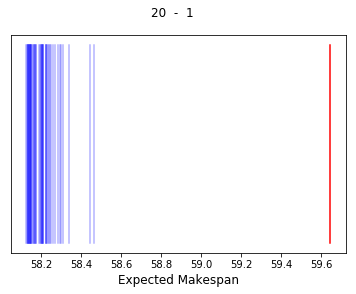

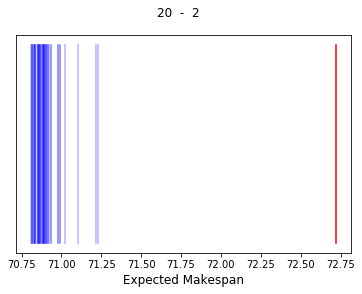

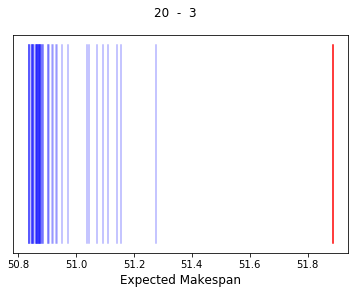

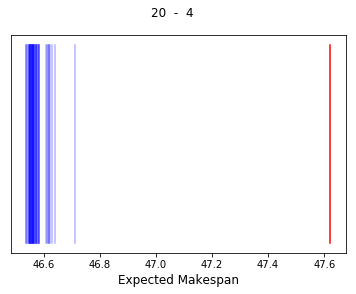

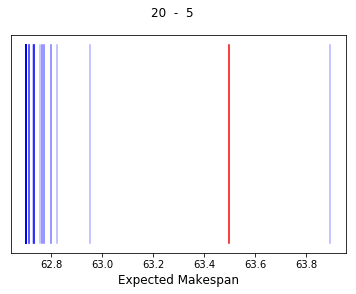

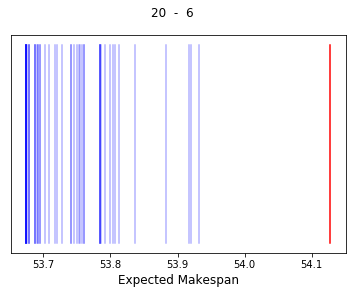

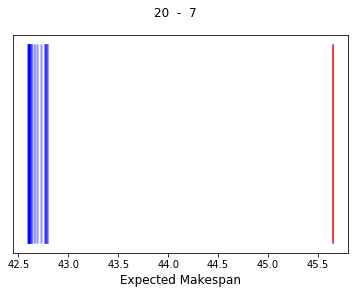

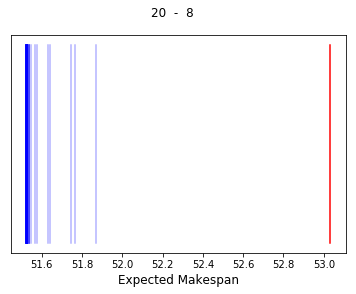

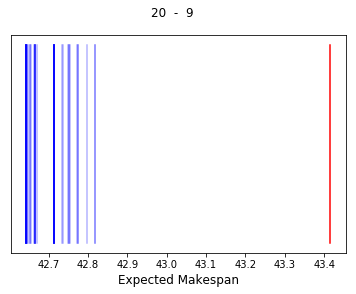

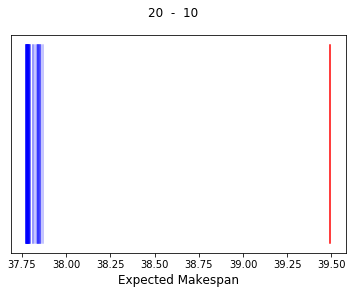

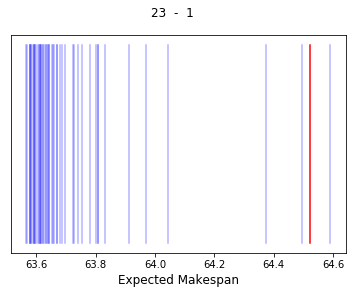

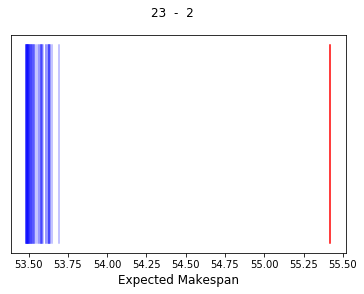

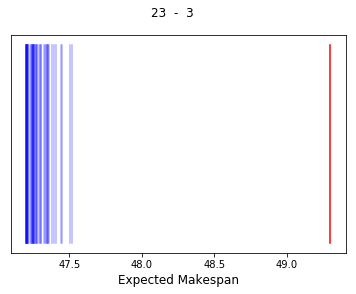

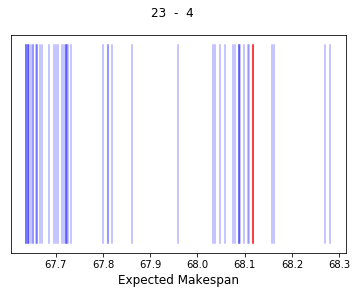

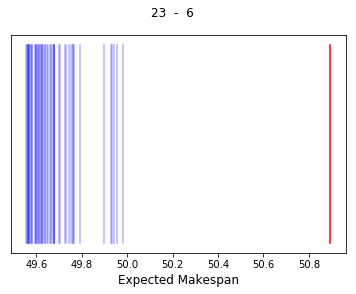

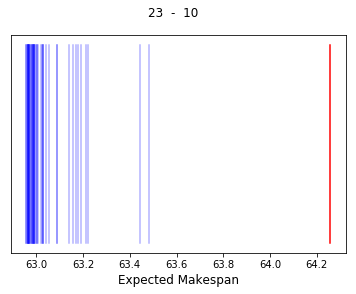

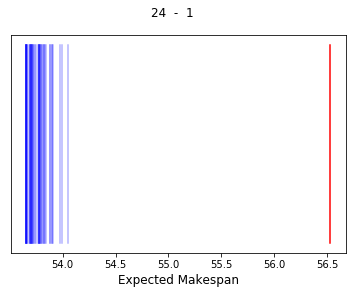

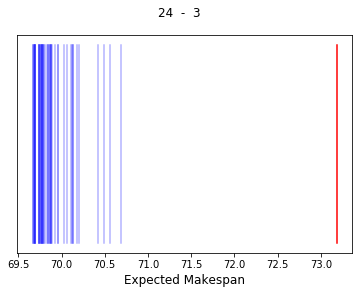

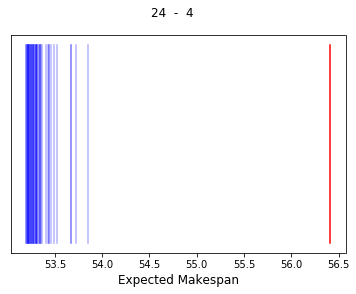

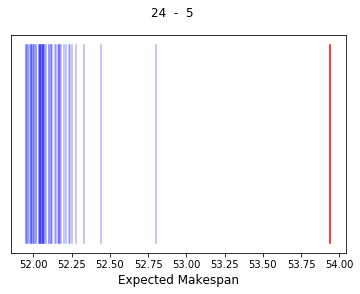

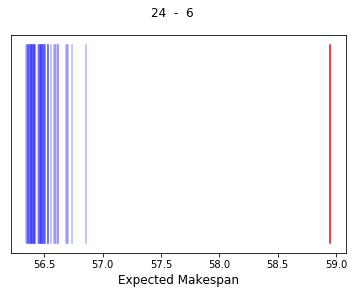

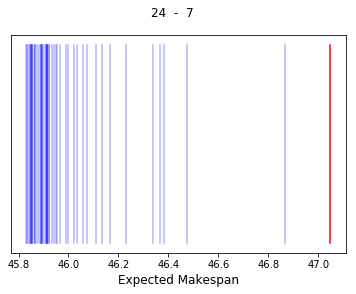

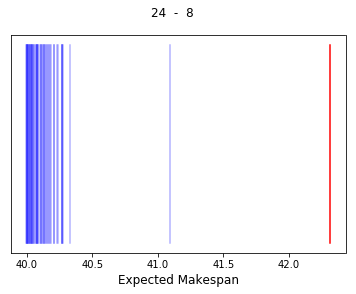

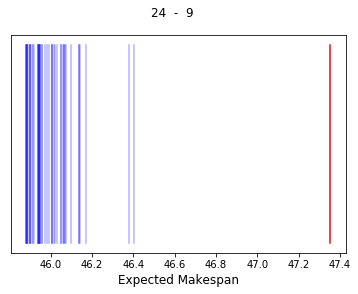

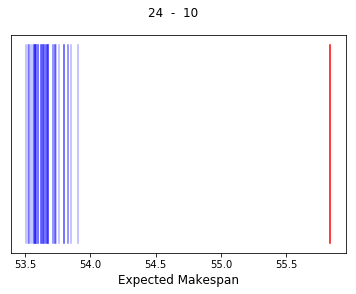

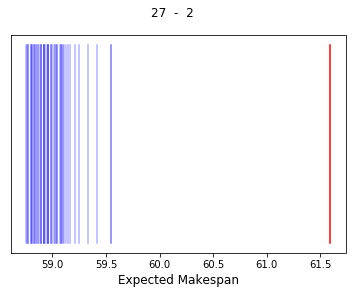

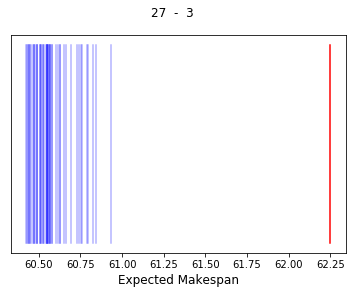

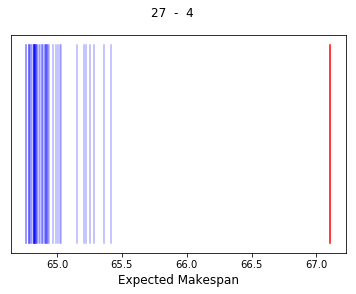

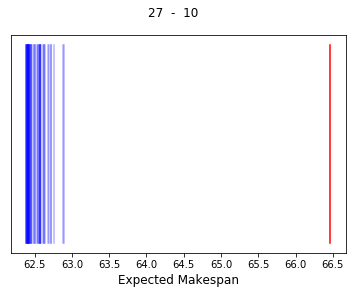

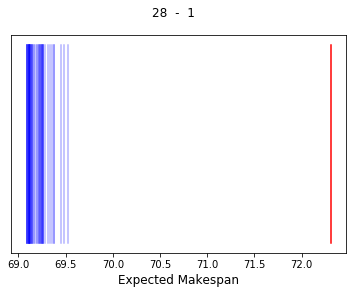

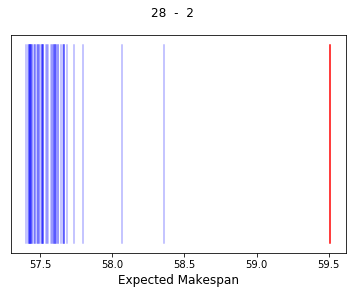

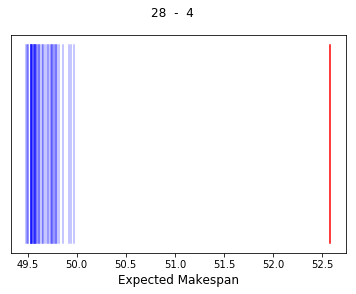

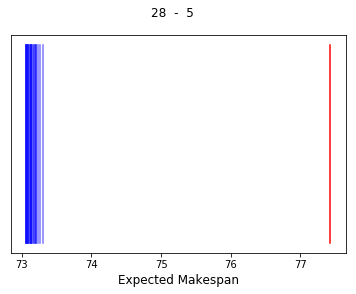

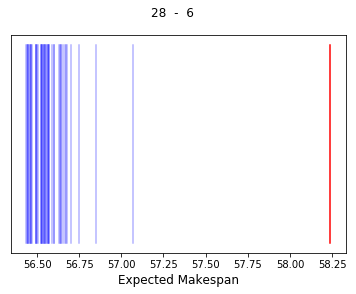

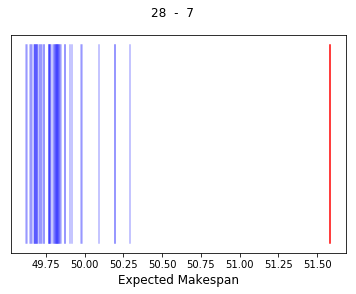

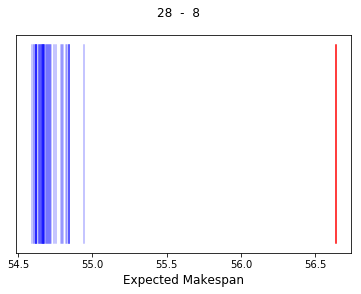

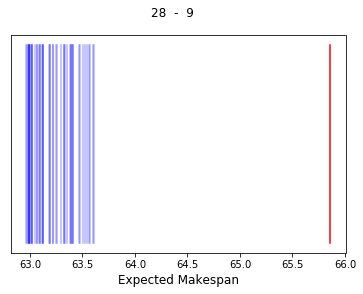

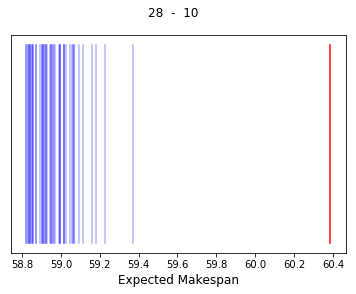

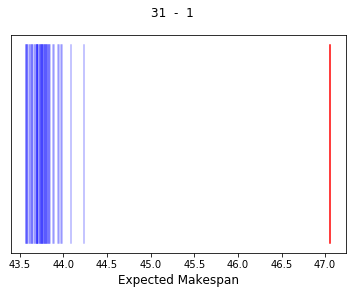

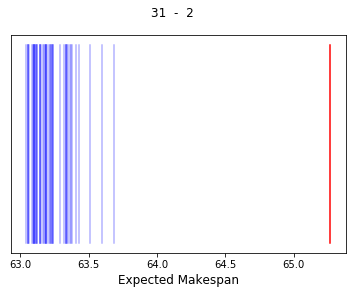

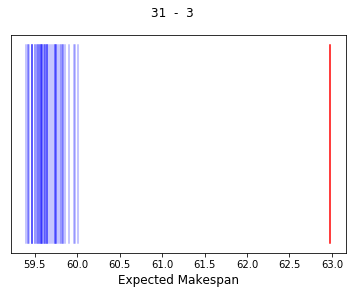

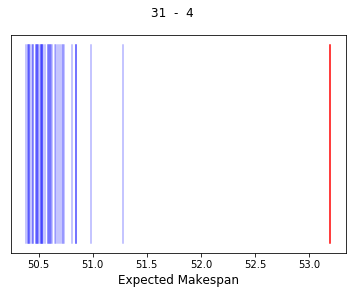

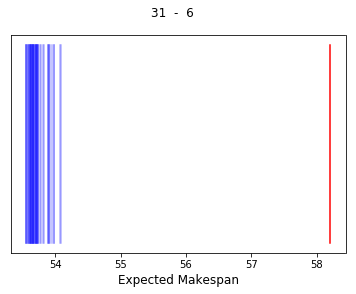

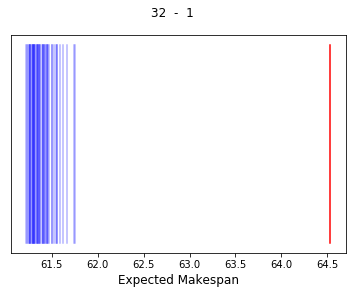

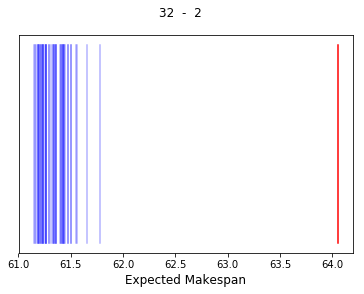

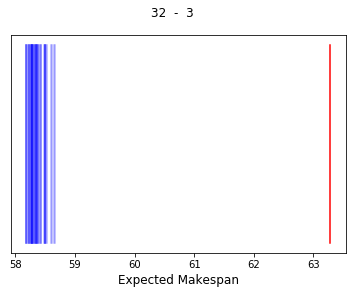

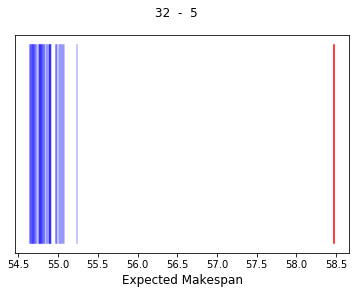

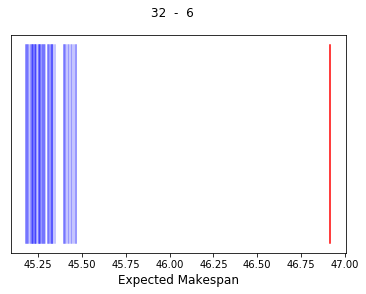

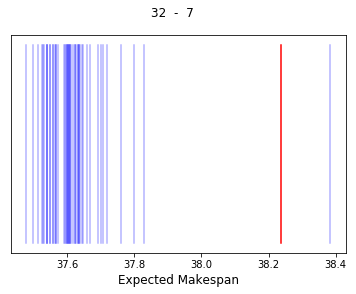

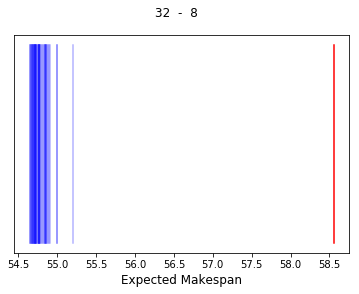

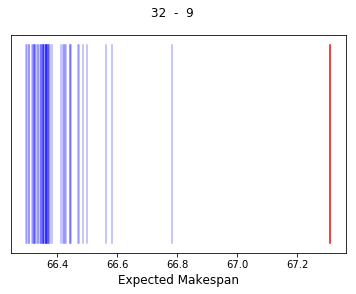

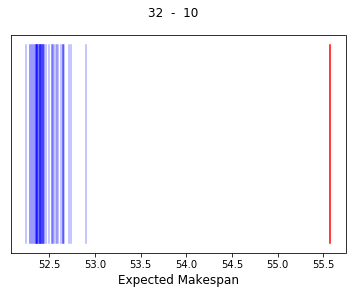

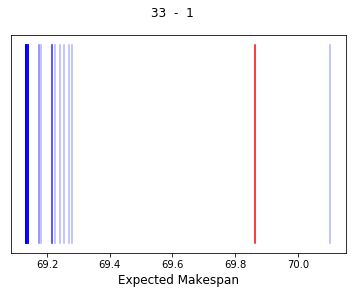

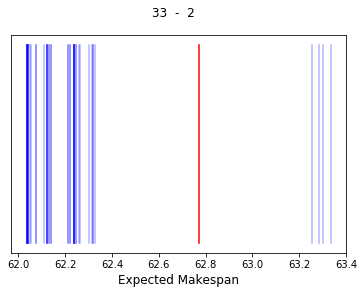

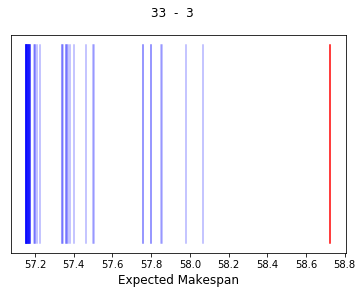

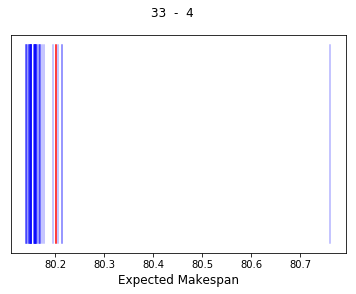

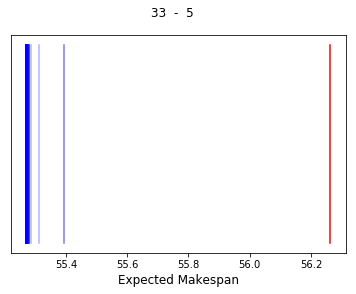

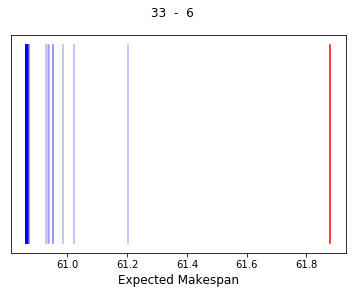

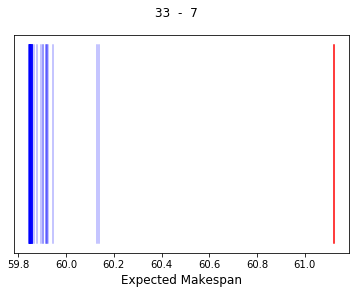

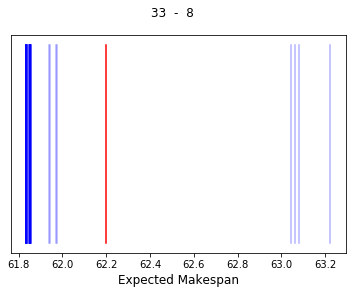

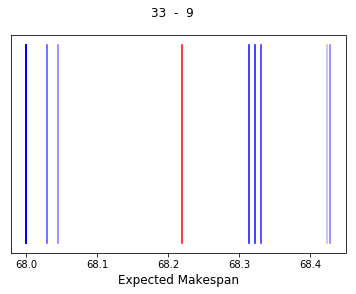

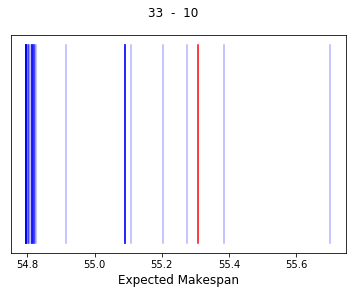

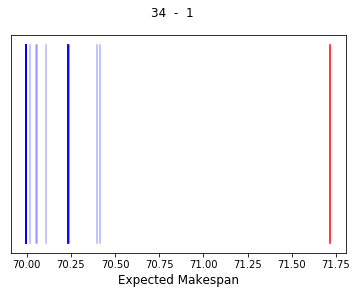

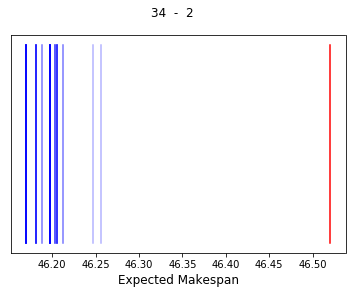

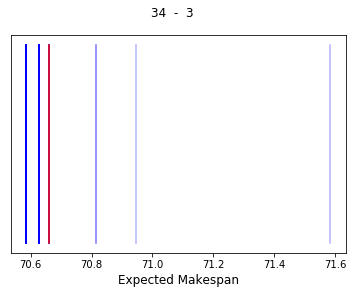

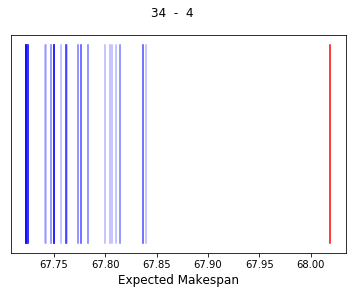

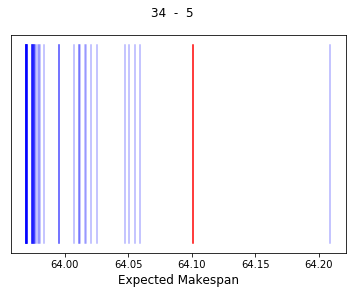

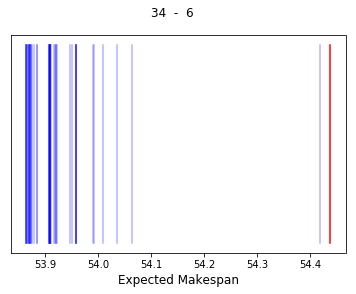

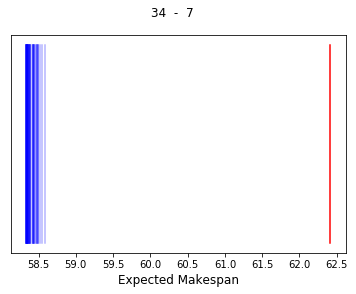

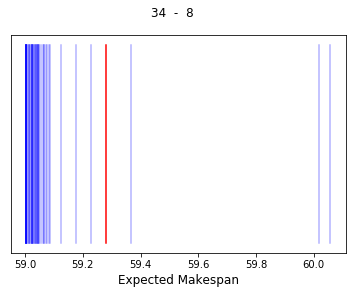

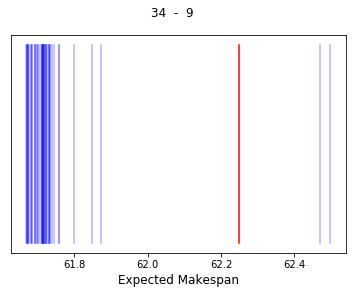

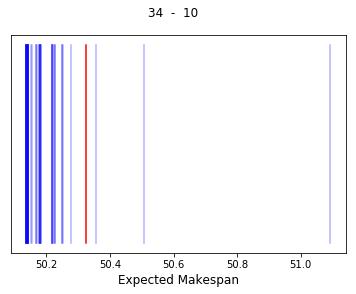

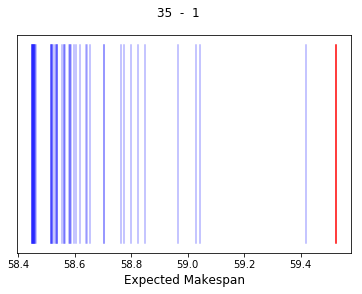

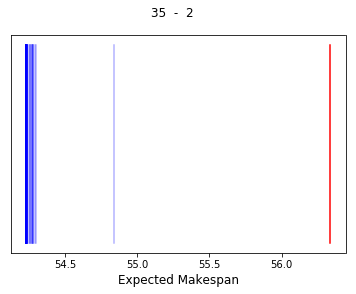

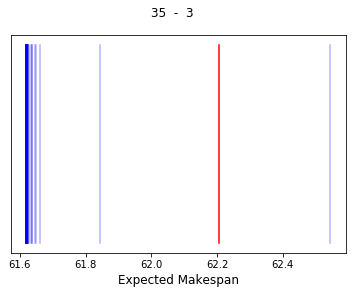

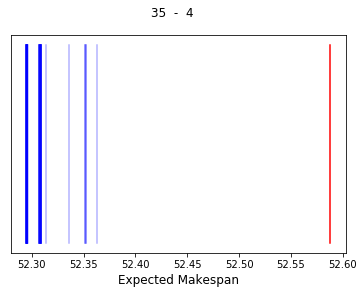

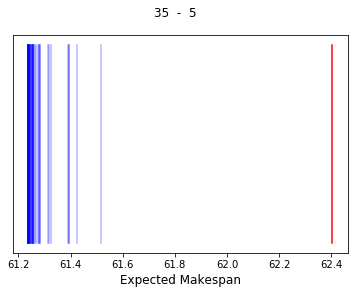

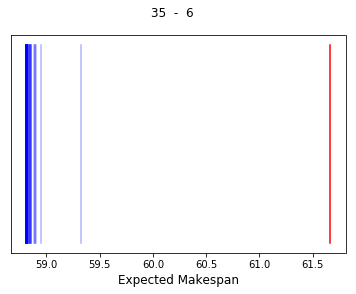

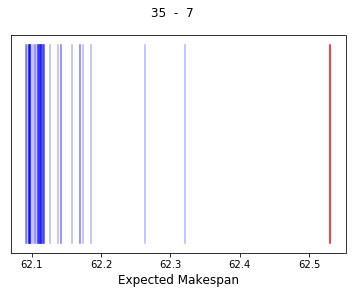

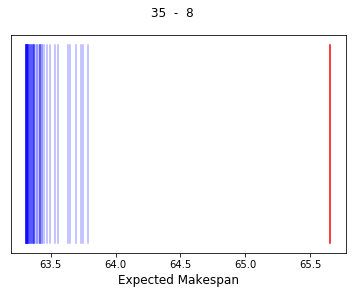

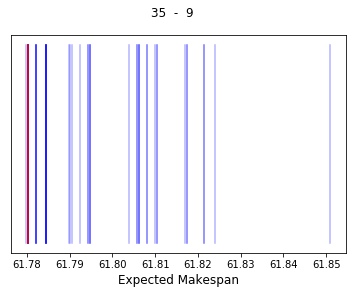

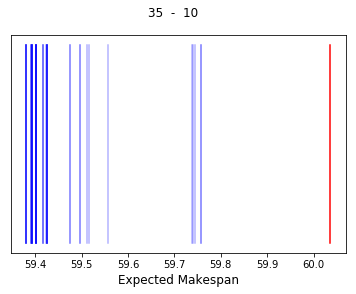

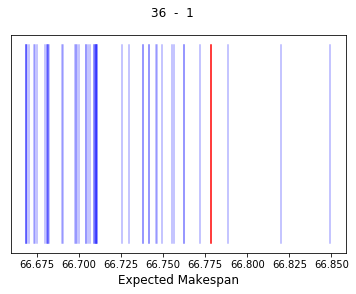

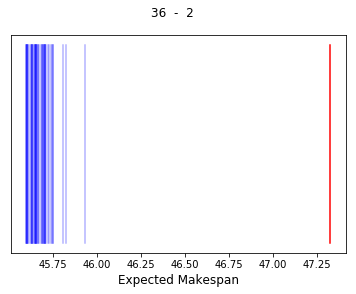

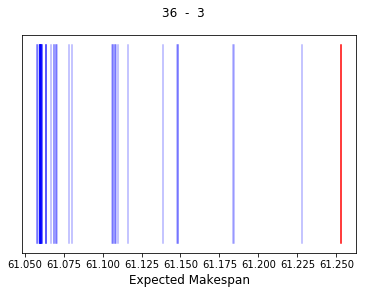

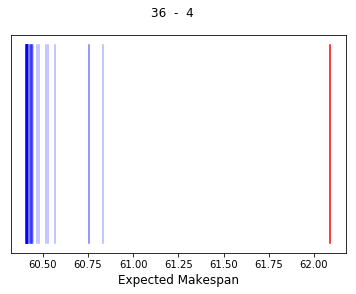

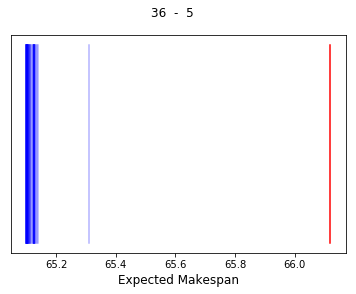

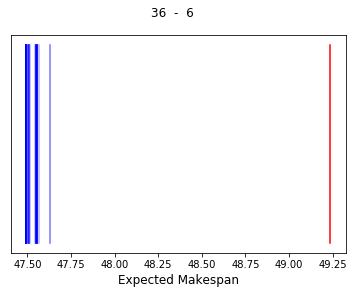

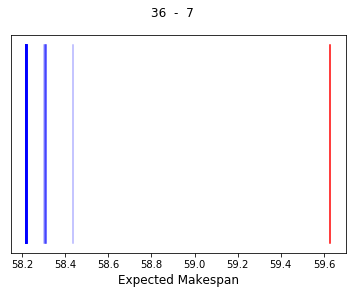

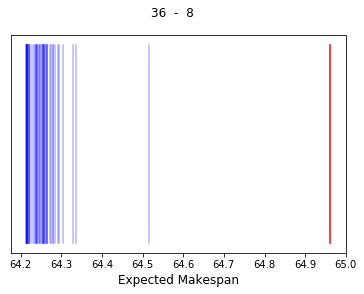

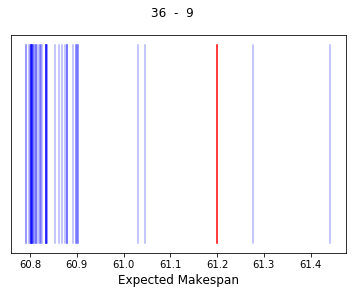

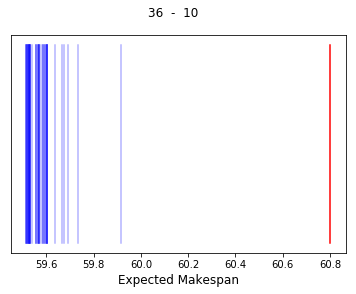

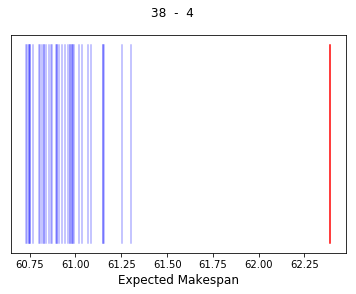

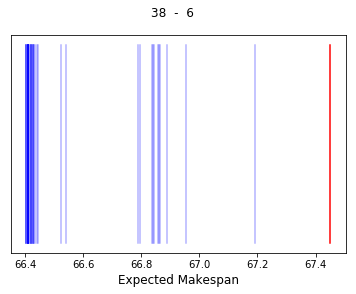

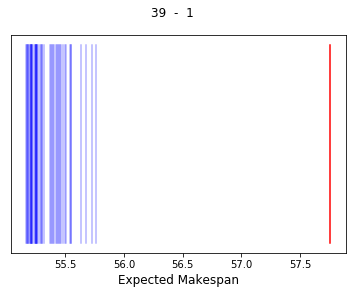

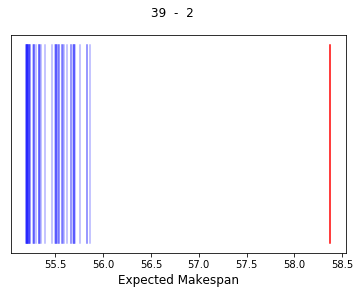

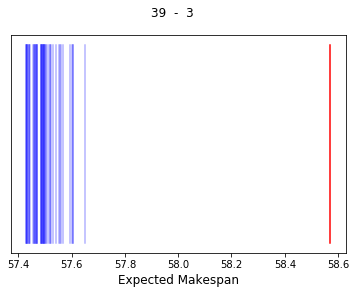

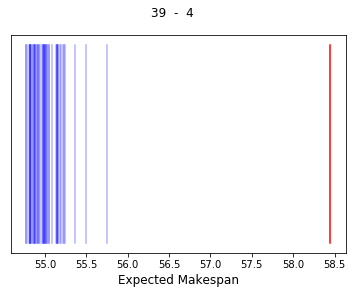

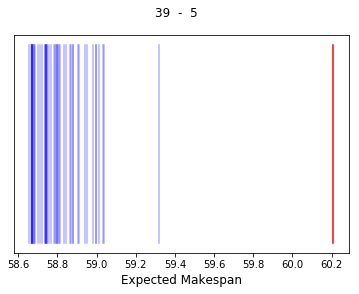

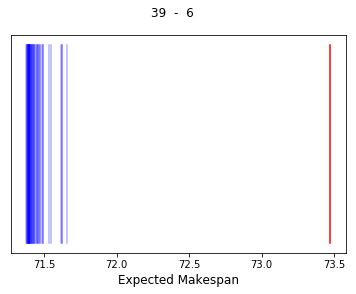

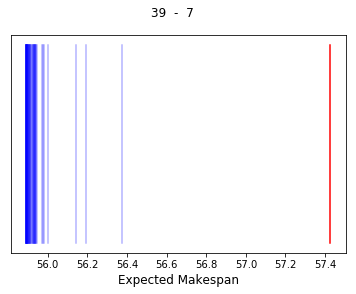

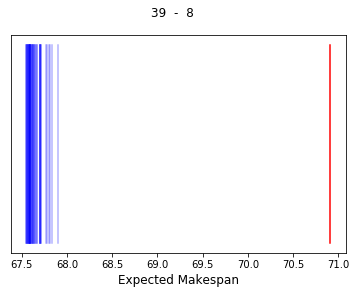

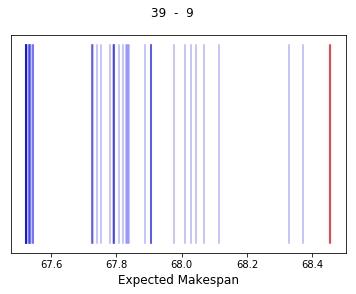

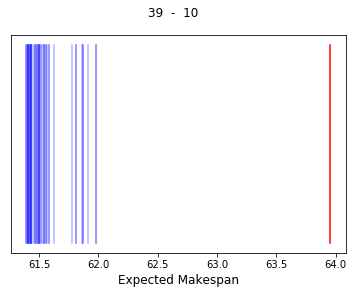

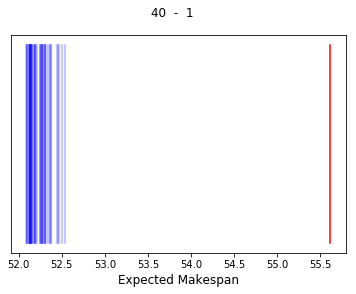

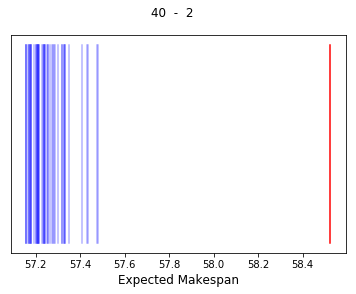

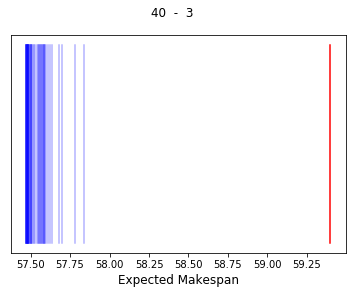

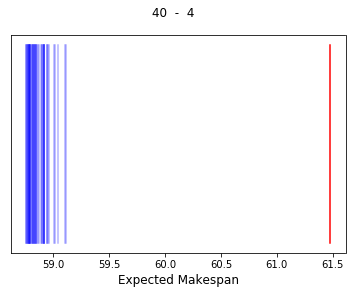

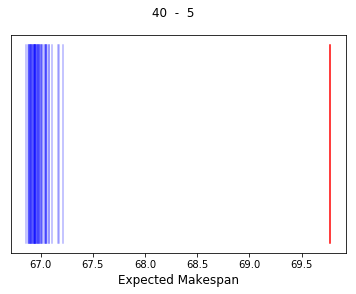

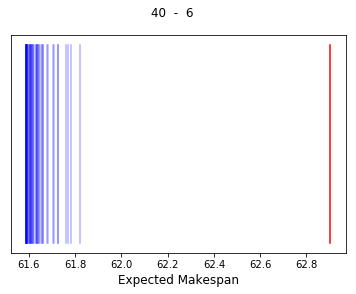

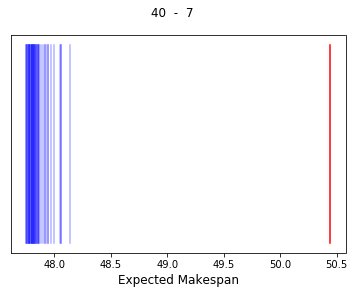

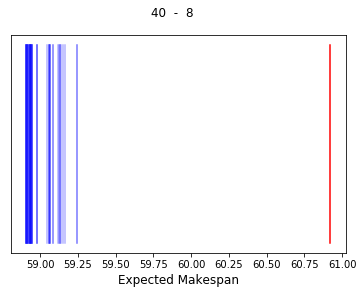

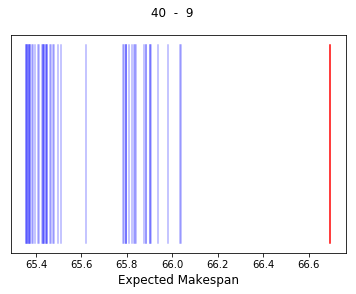

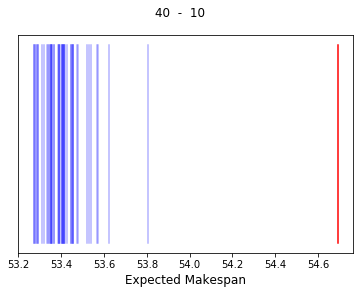

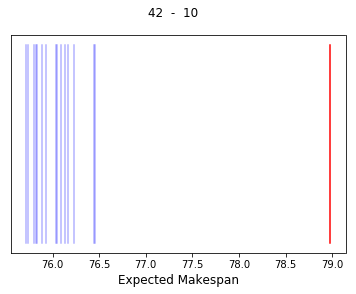

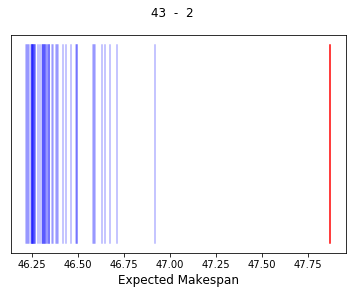

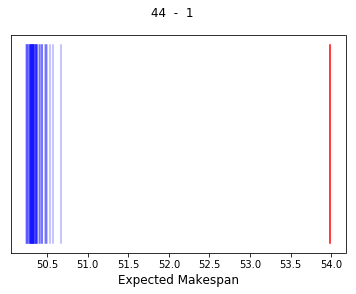

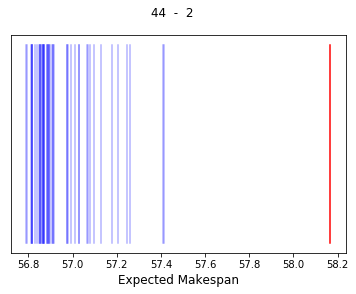

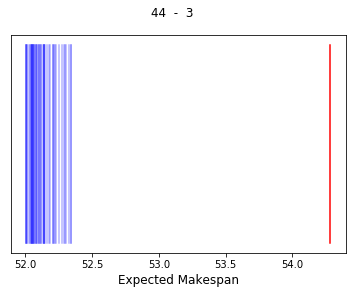

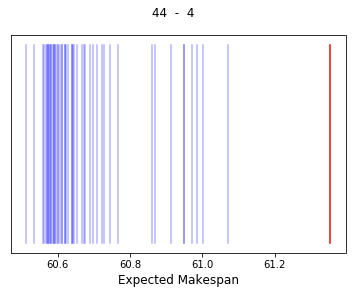

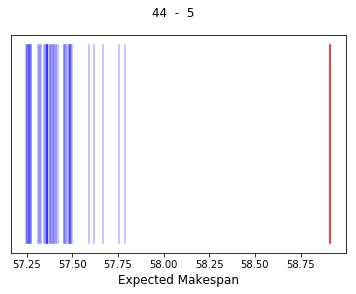

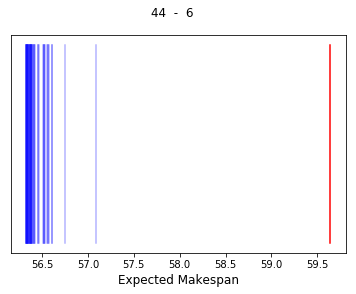

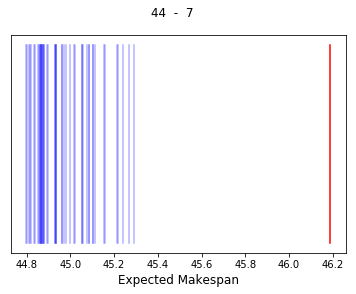

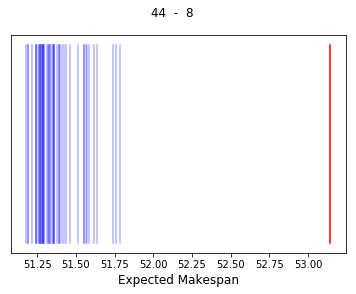

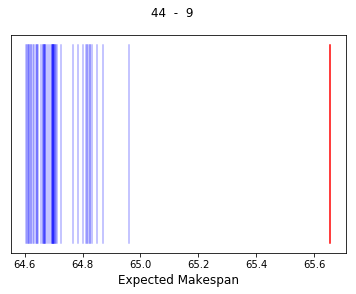

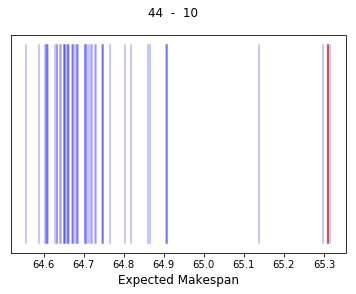

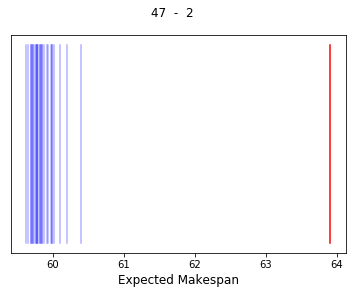

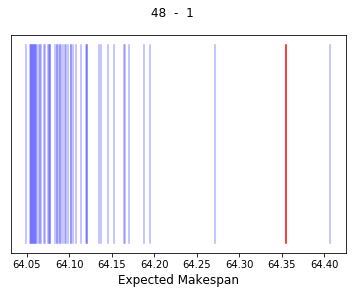

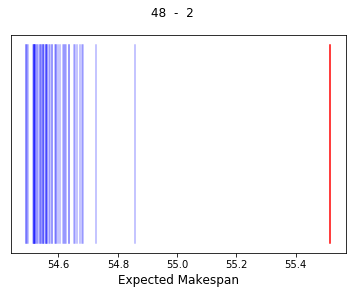

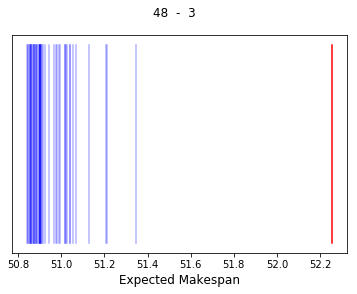

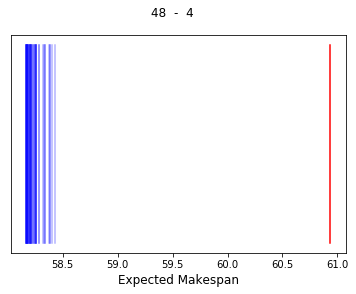

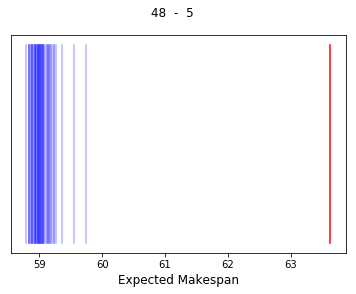

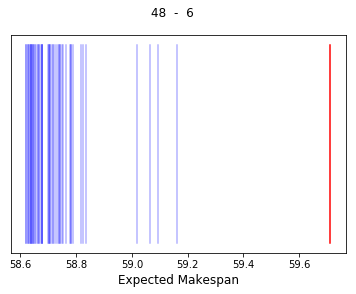

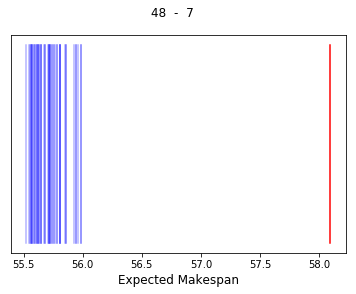

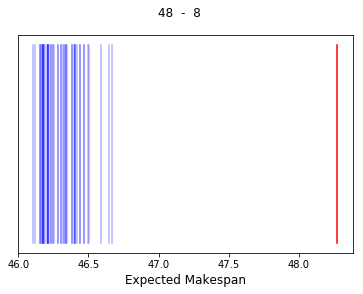

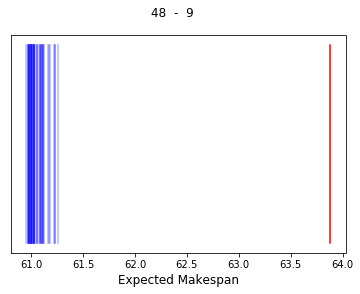

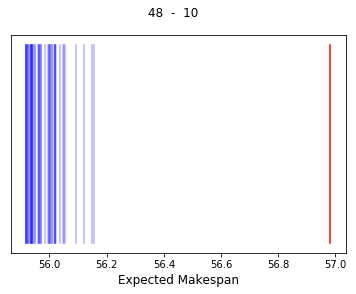

In [13]:
"""
The red line show the result of FCT in which the mean of each distribution is considered.
The blue lines show the result of each of the SFCT runs. around 50 different runs exist for each problem.
Intrestingly, these figures shows considering the mean of distributions is NOT a good idea at all!
"""

for i,j in d0.keys():
    fig = plt.figure()
    fig.suptitle('{}  -  {}'.format(i,j))
    for c in d[i,j]:
        plt.plot([c,c], [0,1], 'b', alpha=0.3)
    plt.plot([d0[i,j], d0[i,j]], [0, 1], 'r')
    plt.yticks([])
    plt.xlabel('Expected Makespan', fontsize=12)
    plt.show()

In [9]:
tmp = df[['i','j']]
ind = []
for row in range(len(df)):
    ind.append((tmp.iloc[row]['i'], tmp.iloc[row]['j']))
ind = sorted(list(set(ind)))

d = {}
for i,j in ind:
    tmp = df[(df['i']==i)&(df['j']==j)][0]
    tmp[tmp == 'FALSE'] = np.inf
    d[i,j] = np.array([float(i) for i in tmp])

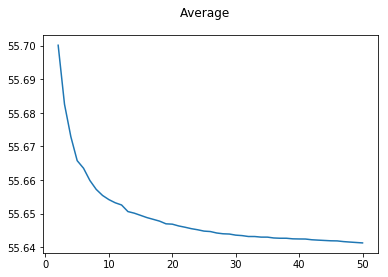

In [37]:
total = {}
for c in range(1, 51):
    tmp = 0
    for k in d:
        tmp += d[k][:c].min()
    total[c] = tmp/len(d)
fig = plt.figure()
fig.suptitle('Average')
plt.plot(total.keys(), total.values())
plt.show()

In [21]:
13466/13480

0.9989614243323442

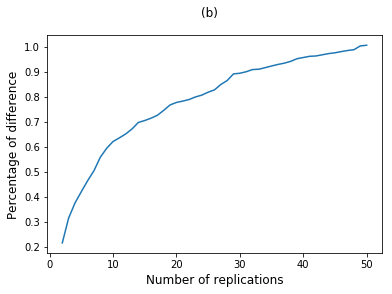

In [26]:
# Difference between the best and worst SAA
total = {}
for c in range(2, 51):
    tmp = 0
    for k in d:
        arr = d[k][:c]
        arr = arr[arr!=np.inf]
        tmp += (arr.max() - arr.min())/arr.min()
    total[c] = tmp/len(d) * 100
fig = plt.figure()
fig.suptitle('(b)')
plt.xlabel('Number of replications', fontsize=12)
plt.ylabel('Percentage of difference', fontsize=12)
plt.plot(total.keys(), total.values())
plt.show()

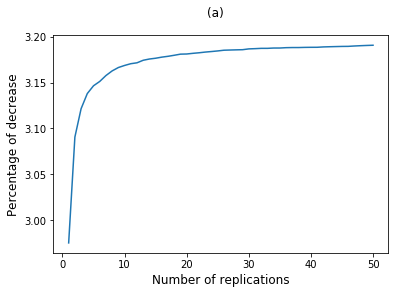

In [63]:
# Average improvement in the Expected Makespan of all problems
total = {}
for c in range(1, 51):
    tmp = 0
    for k in d:
        arr = d[k][:c]
        arr[arr==np.inf] = d[k][:c+1].min()
        arr = arr[arr!=np.inf]
        tmp += (d0[k] - arr.min())/d0[k]
    total[c] = tmp/len(d) * 100
fig = plt.figure()
fig.suptitle('(a)')
plt.xlabel('Number of replications', fontsize=12)
plt.ylabel('Percentage of decrease', fontsize=12)
plt.plot(total.keys(), total.values())
plt.show()

In [31]:
total[50]

3.190674439556501

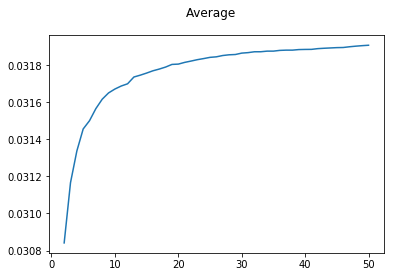

In [51]:
total = {}
for c in range(2, 51):
    tmp = 0
    for k in d:
        arr = d[k][:c]
        arr = arr[arr!=np.inf]
        tmp += (d0[k] - arr.min())/d0[k]
    total[c] = tmp/len(d)
fig = plt.figure()
fig.suptitle('Average')
plt.xlabel('Expected Makespan', fontsize=12)
plt.plot(total.keys(), total.values())
plt.show()

In [54]:
total[1]

0.029791223263131068

In [57]:
total[50]

0.03190674439556501

In [58]:
(total[50]-total[1])/total[1]

0.0710115564489782

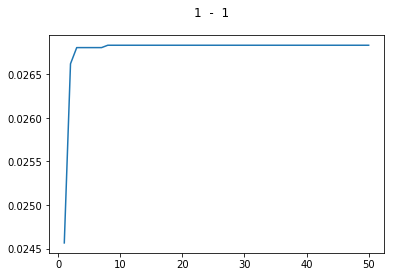

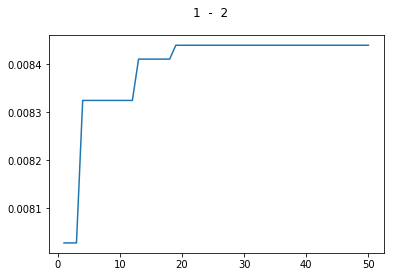

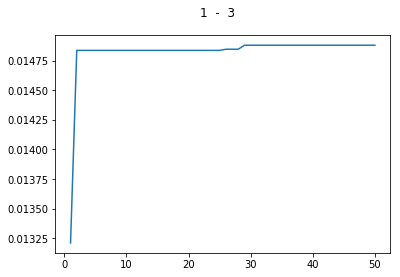

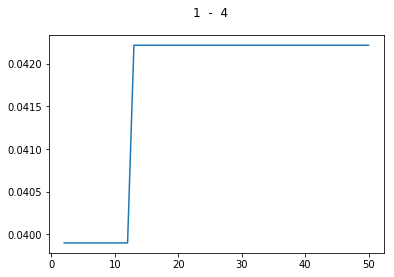

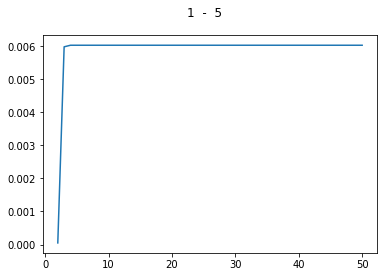

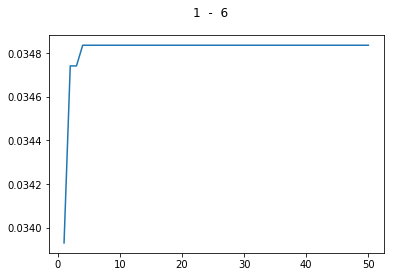

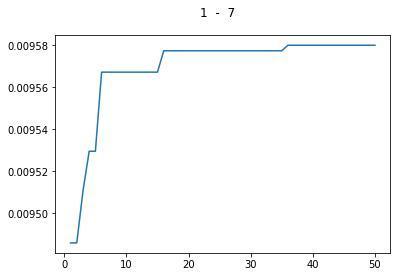

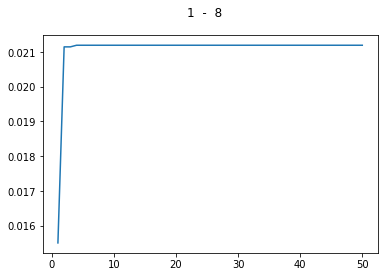

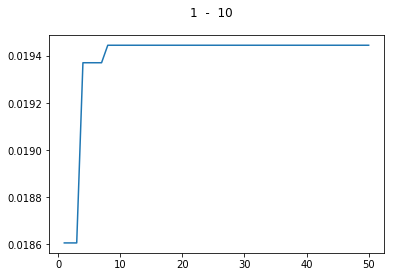

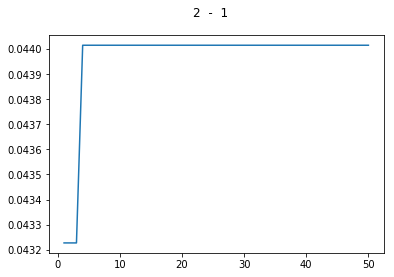

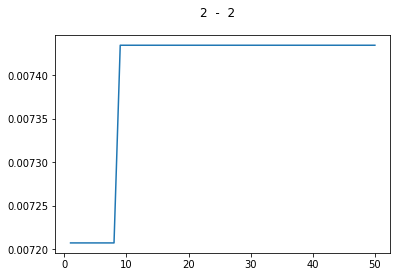

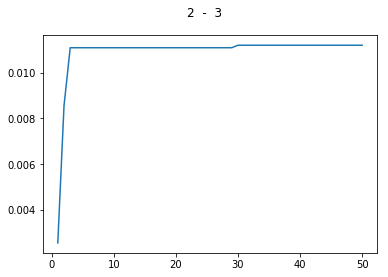

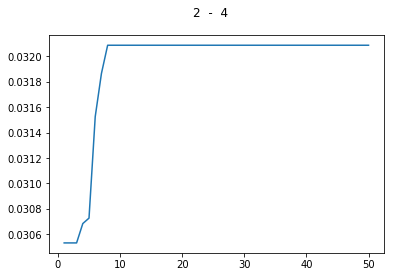

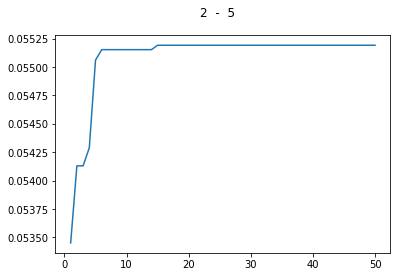

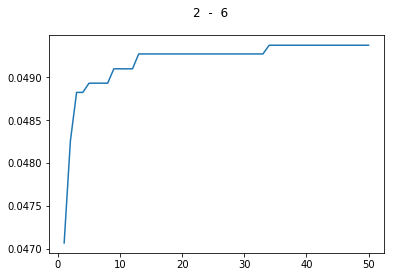

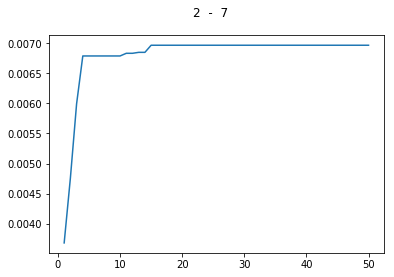

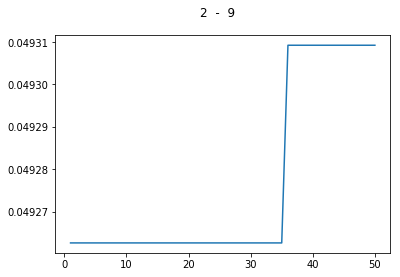

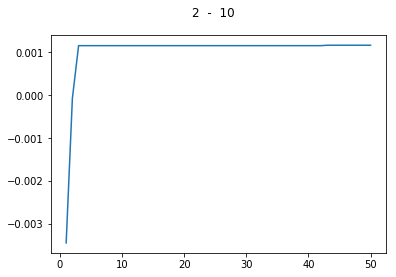

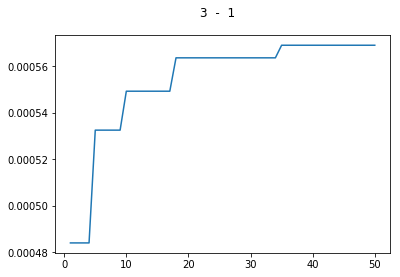

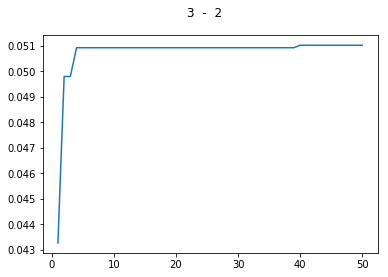

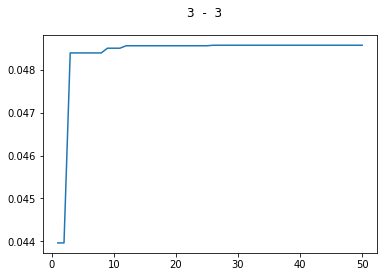

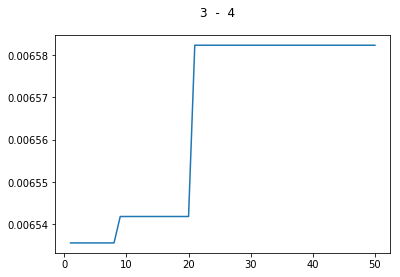

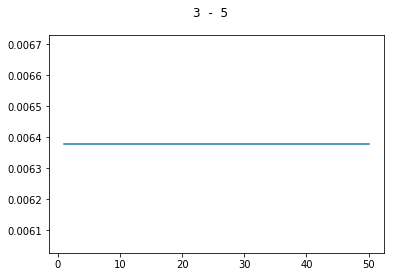

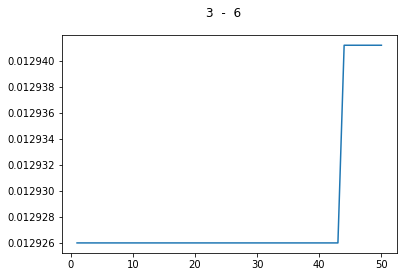

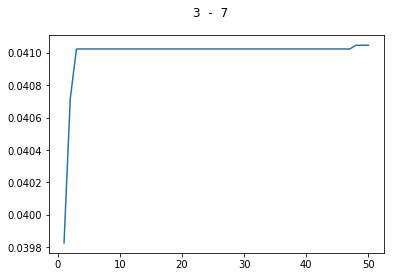

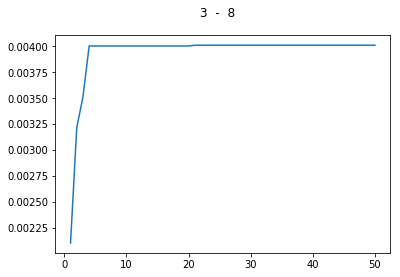

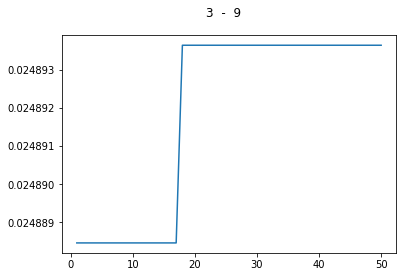

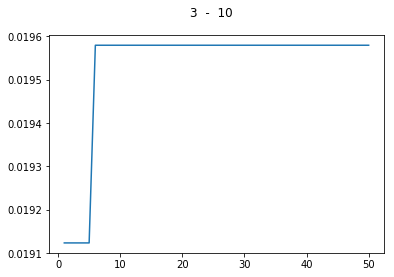

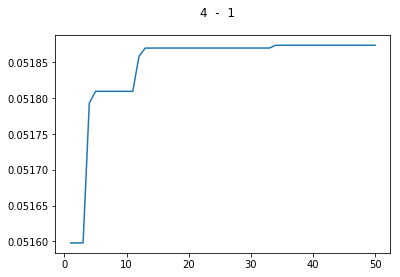

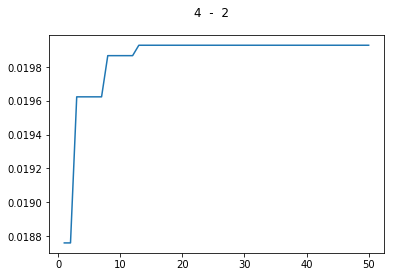

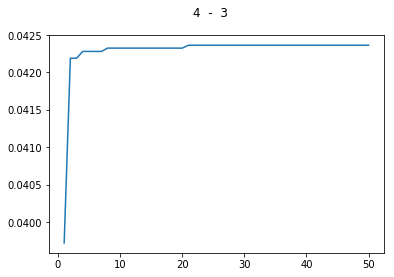

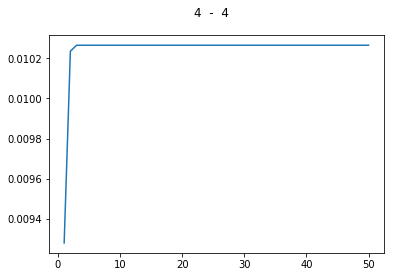

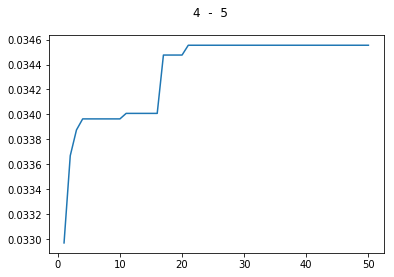

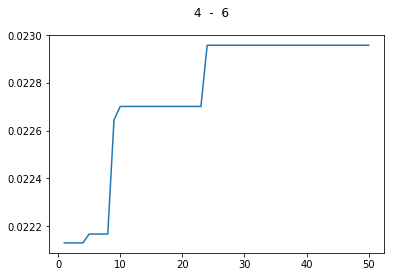

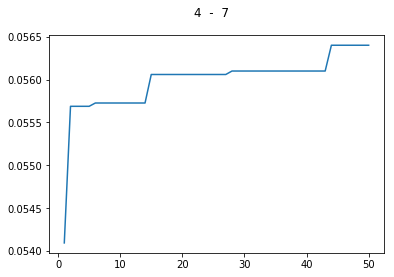

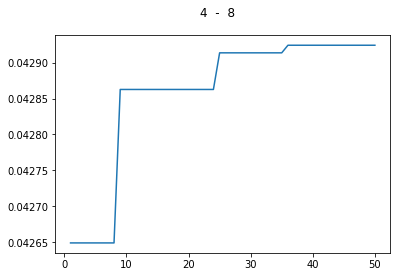

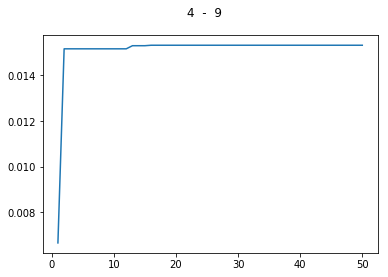

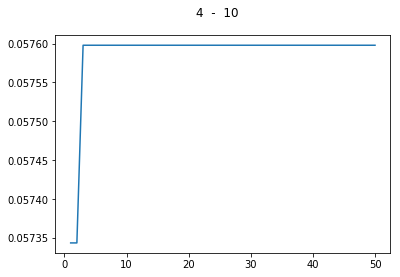

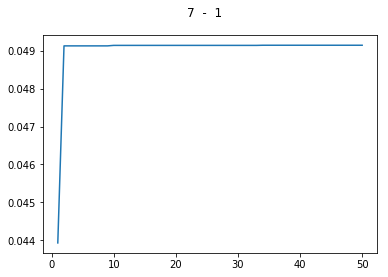

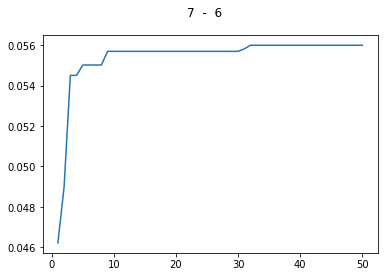

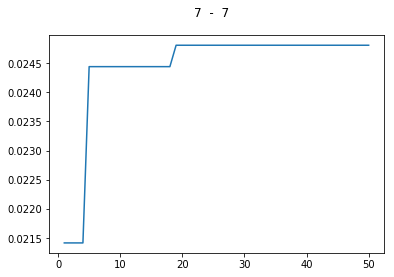

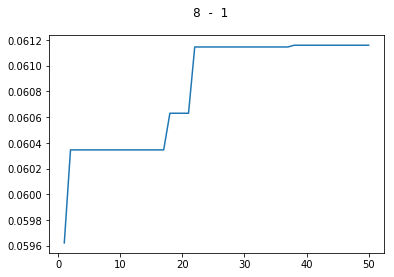

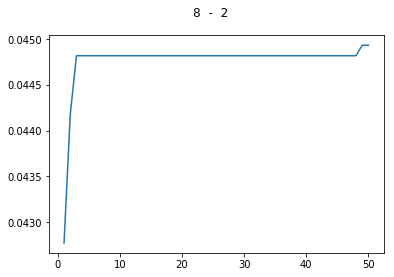

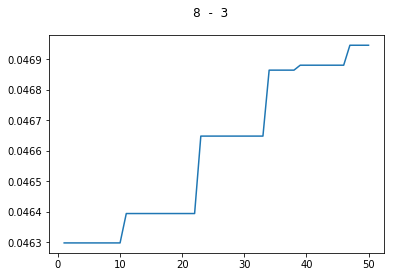

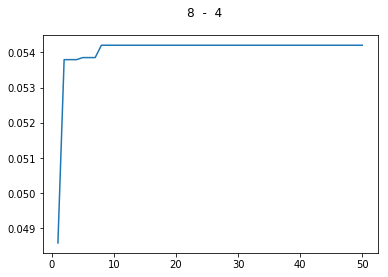

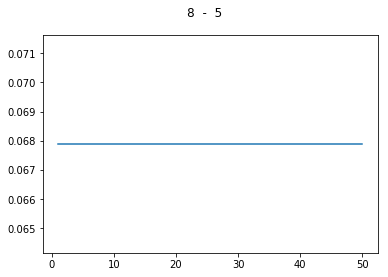

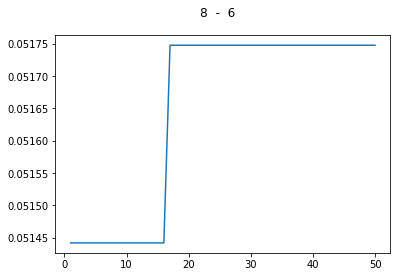

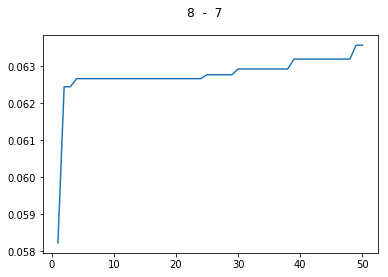

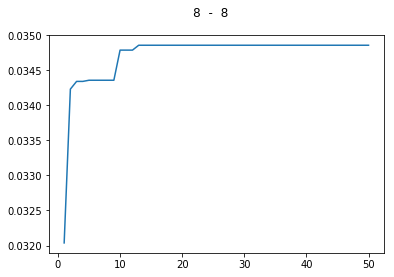

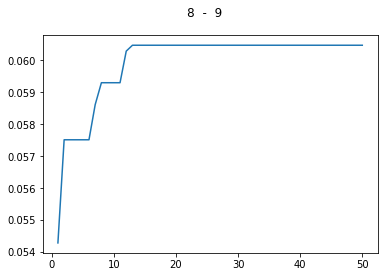

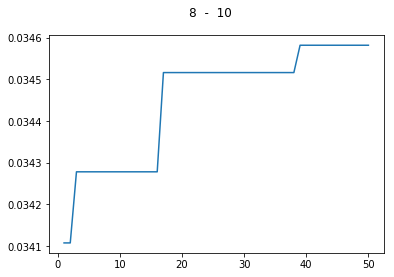

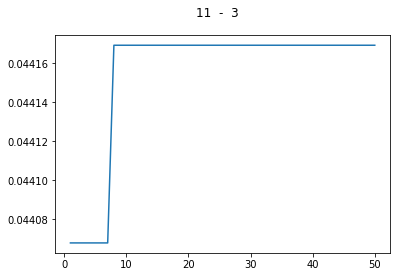

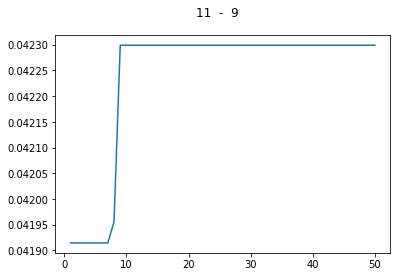

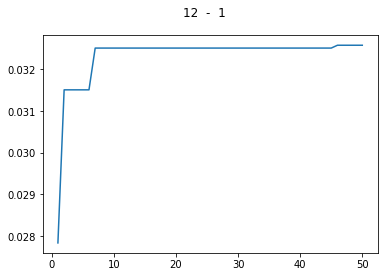

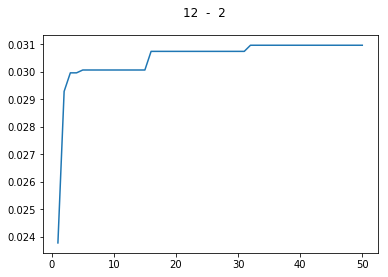

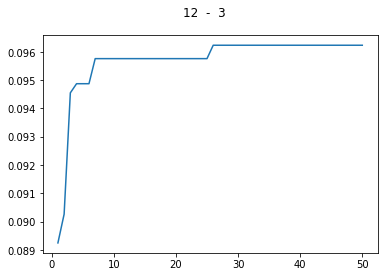

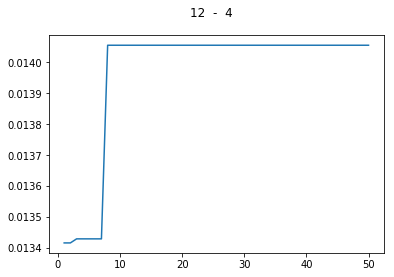

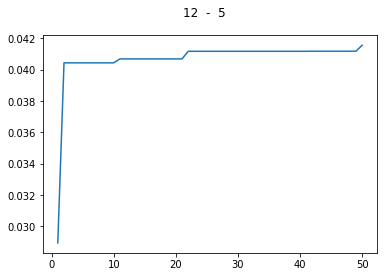

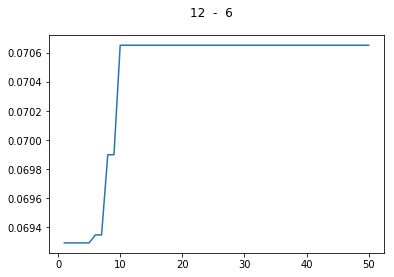

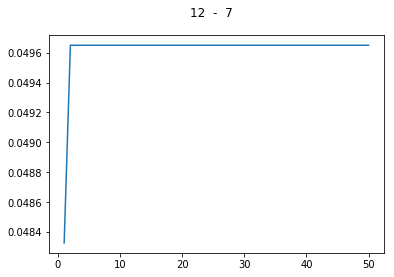

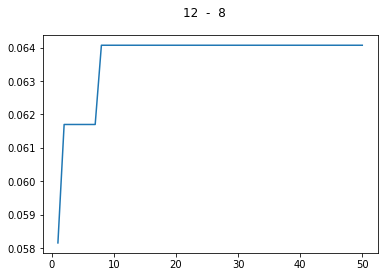

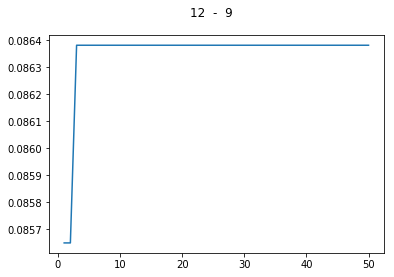

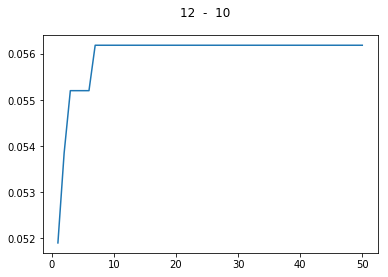

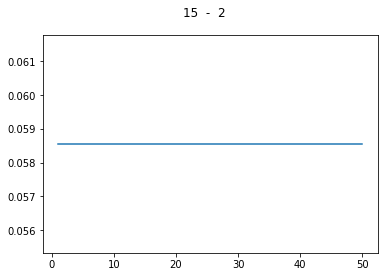

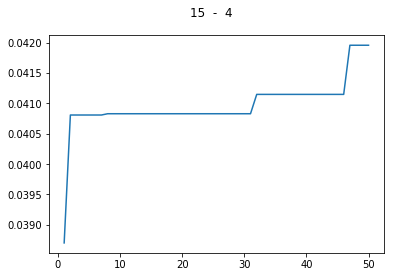

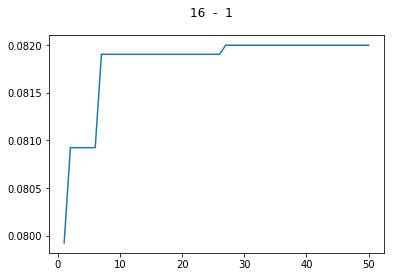

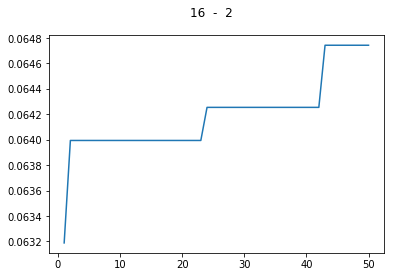

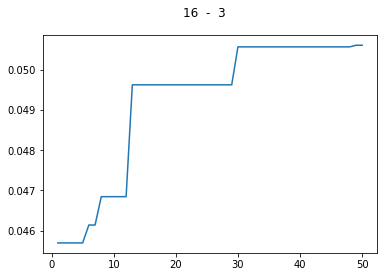

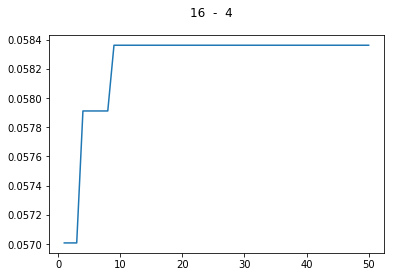

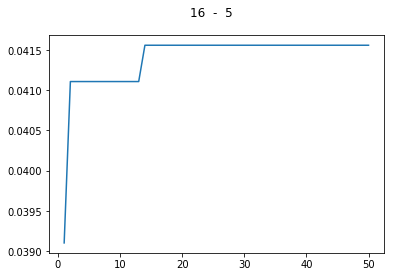

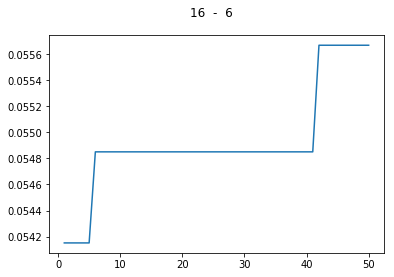

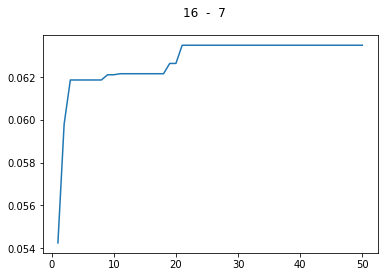

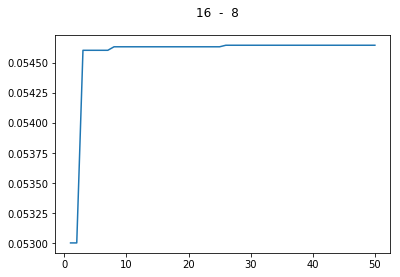

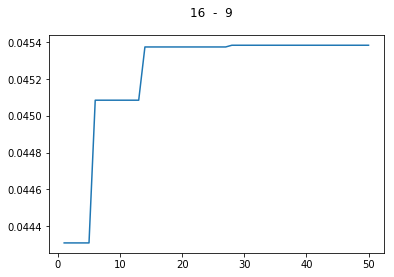

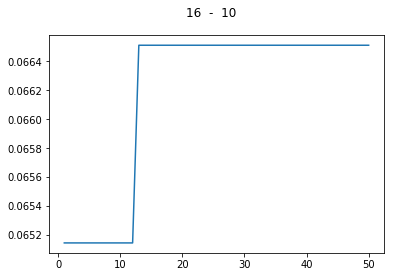

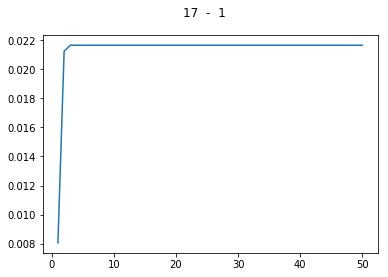

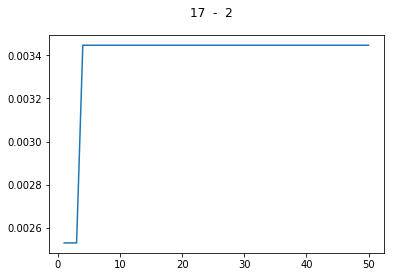

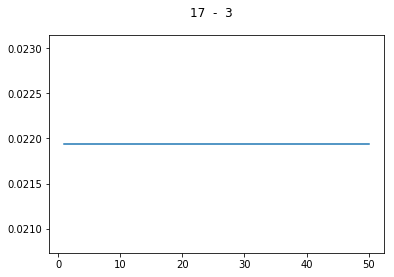

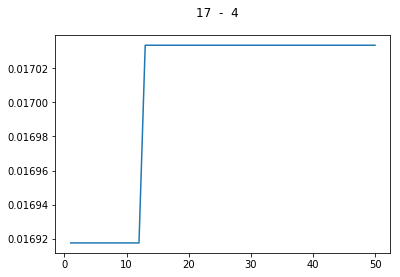

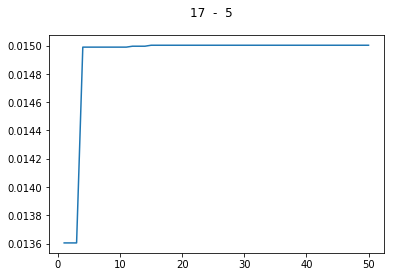

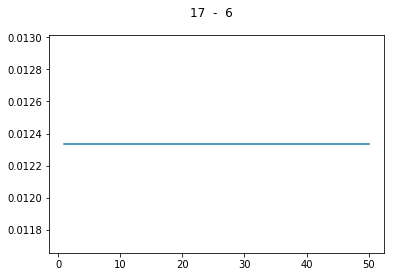

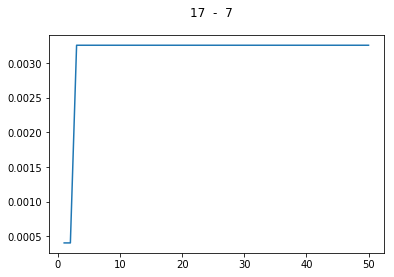

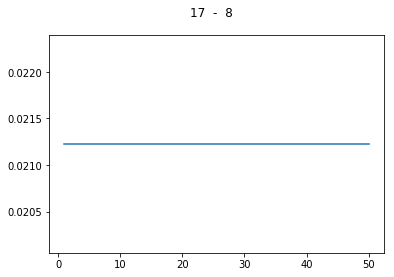

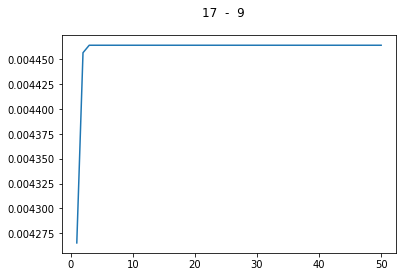

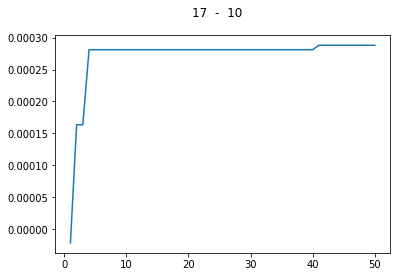

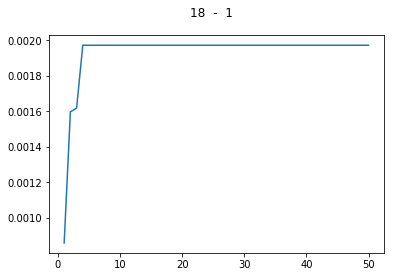

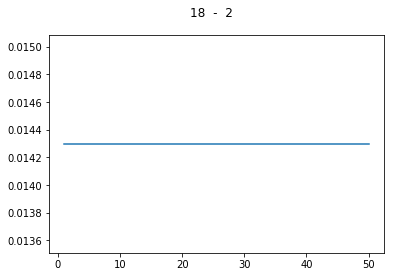

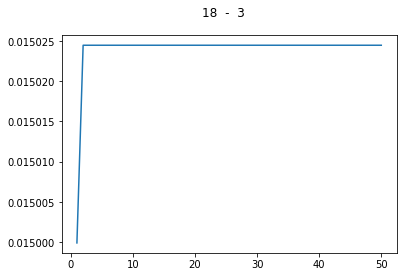

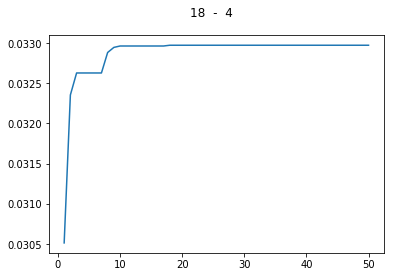

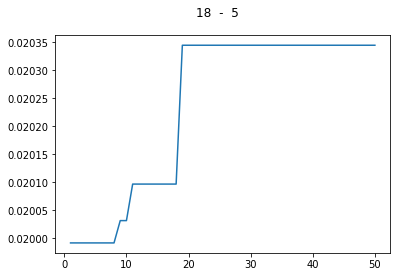

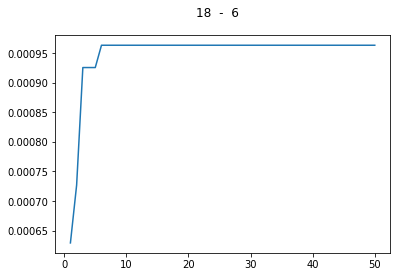

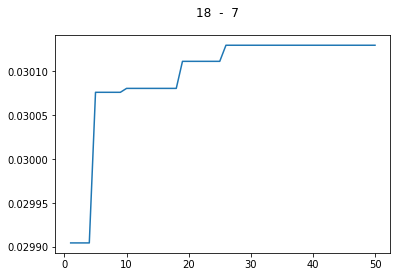

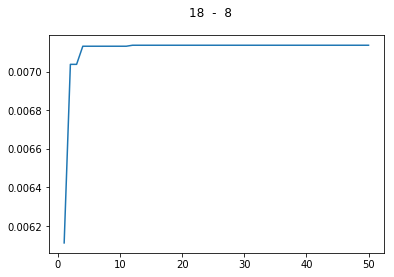

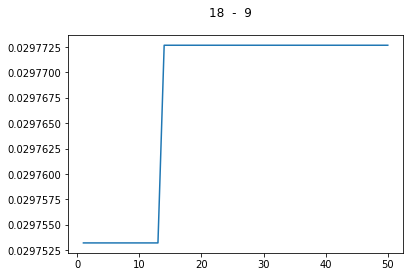

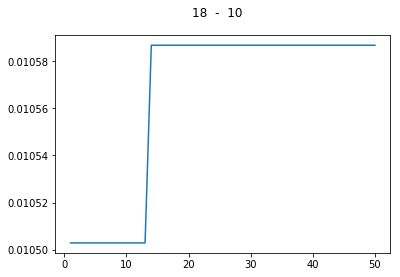

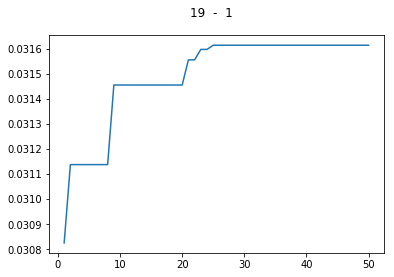

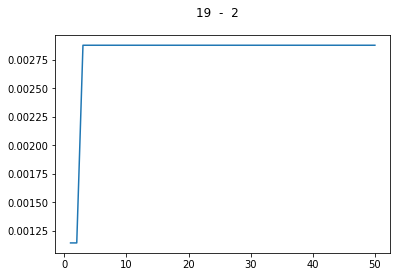

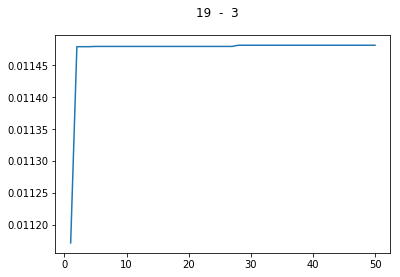

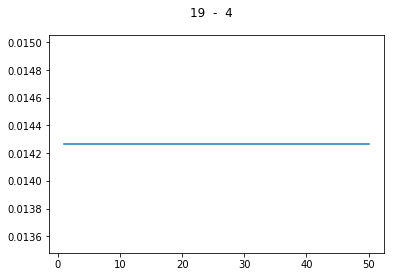

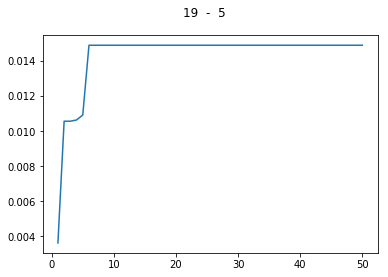

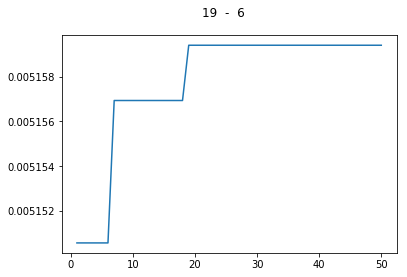

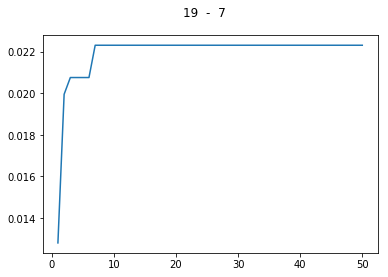

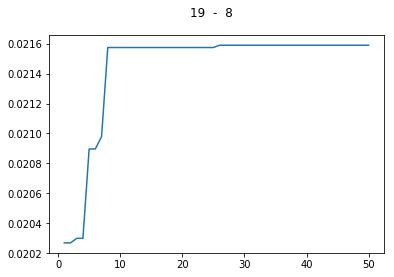

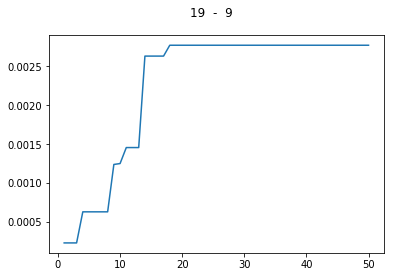

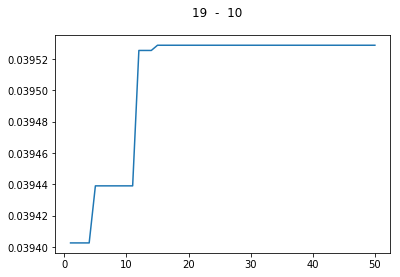

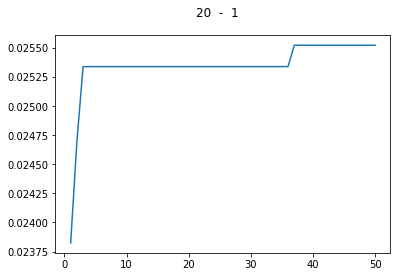

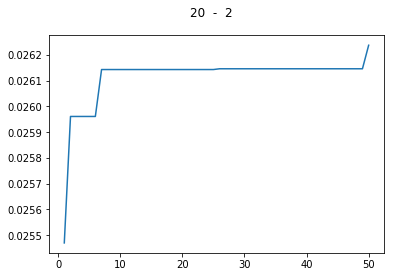

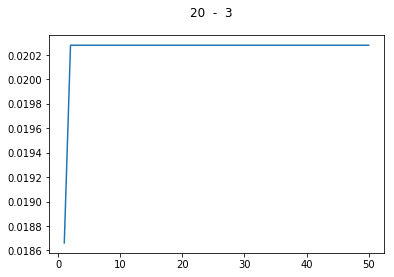

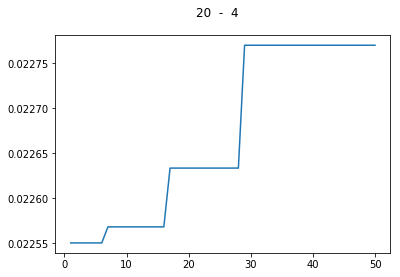

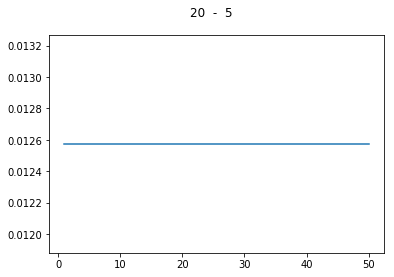

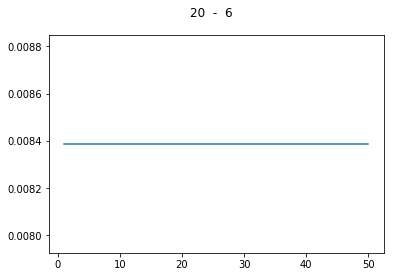

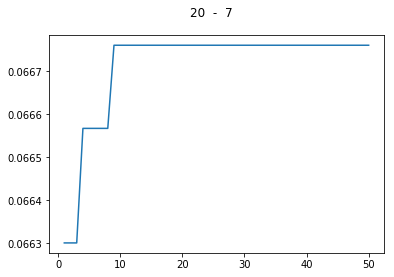

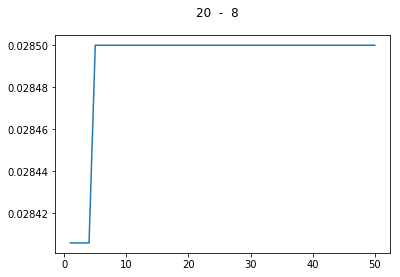

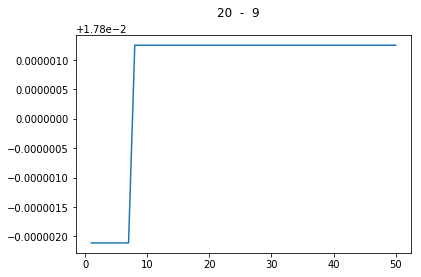

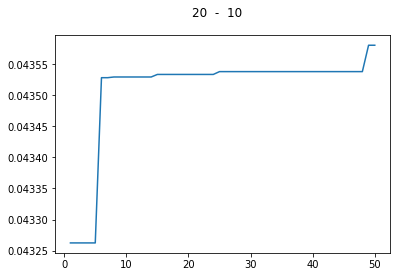

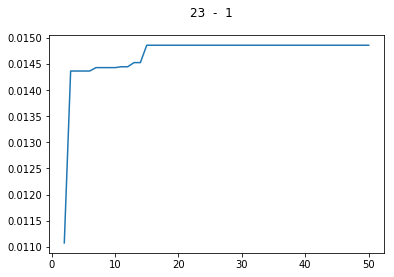

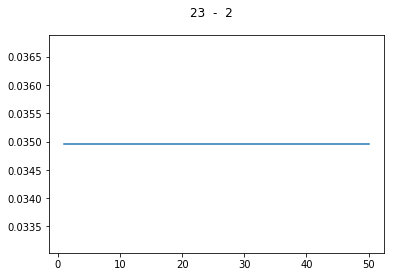

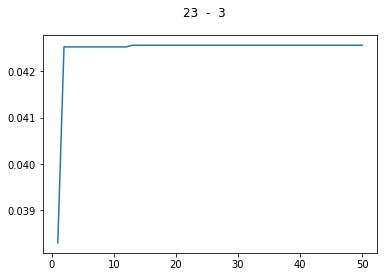

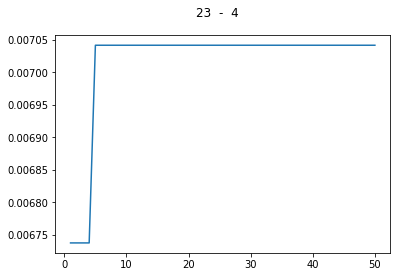

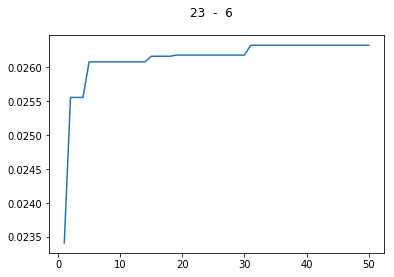

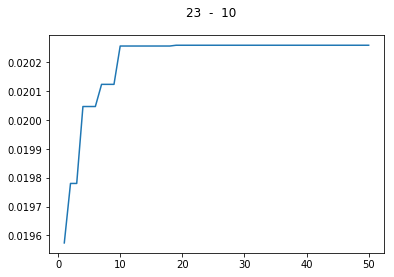

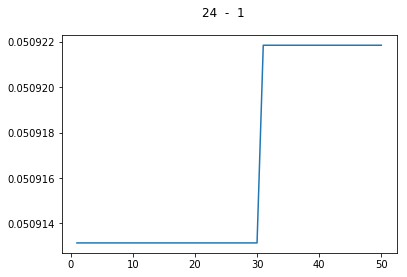

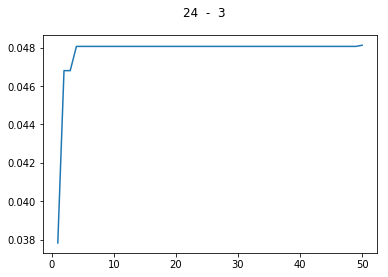

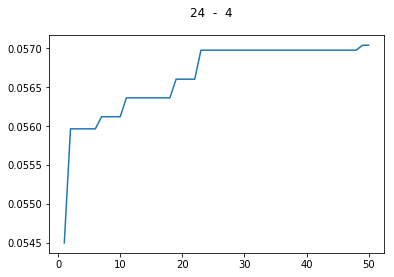

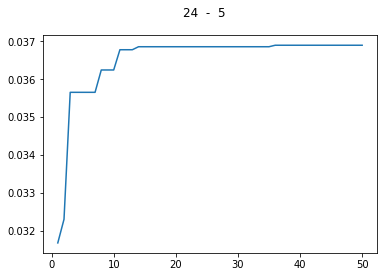

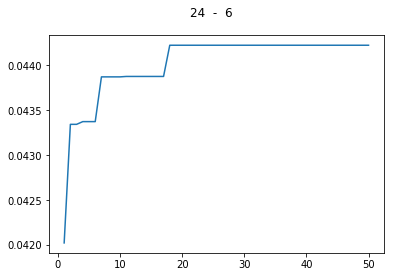

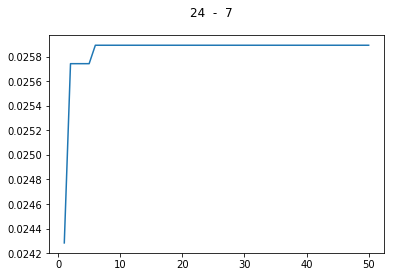

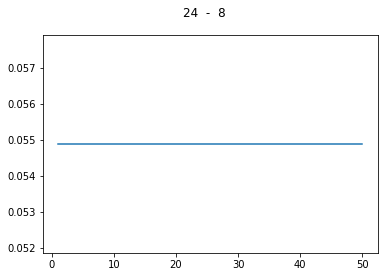

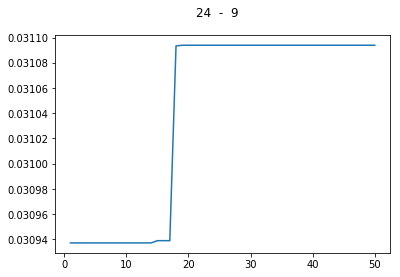

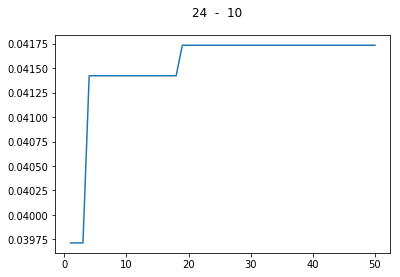

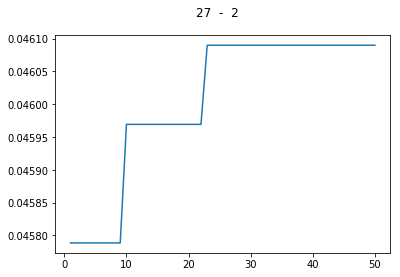

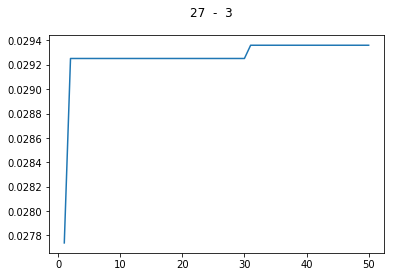

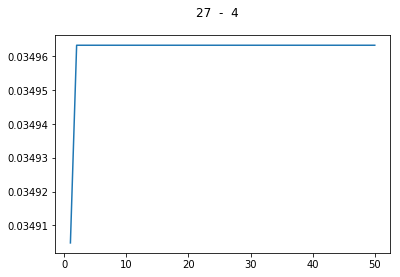

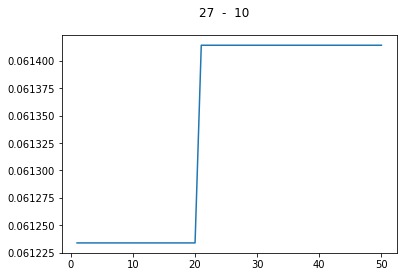

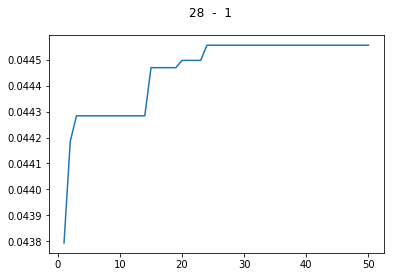

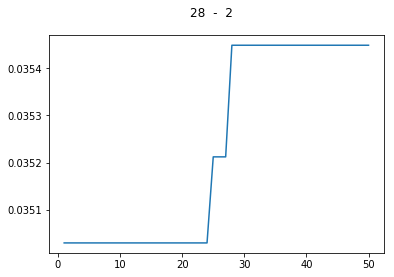

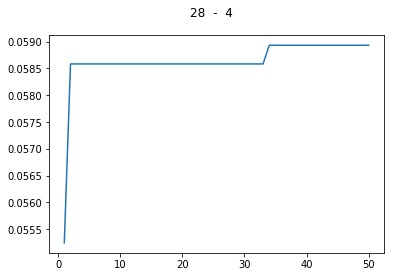

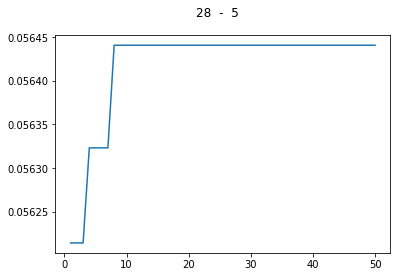

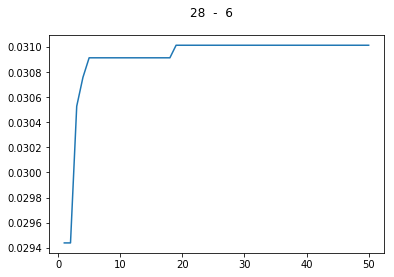

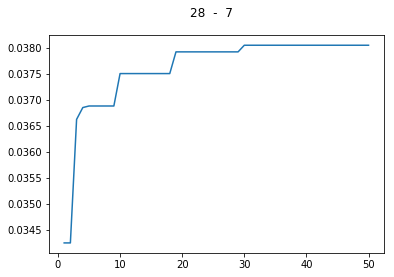

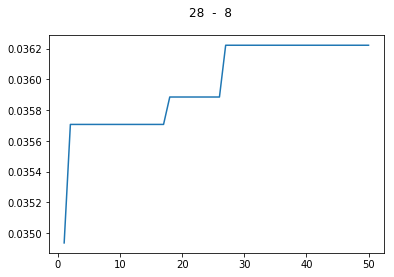

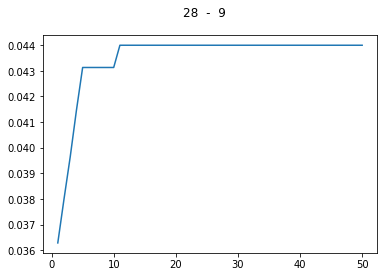

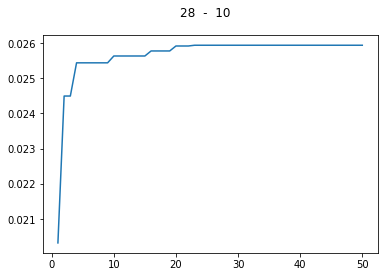

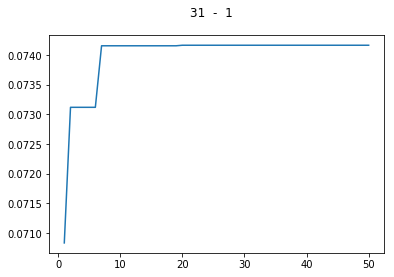

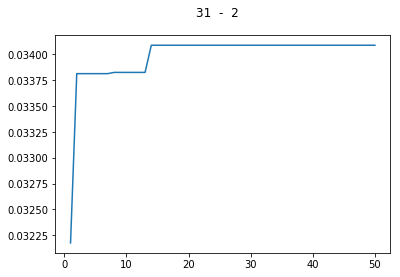

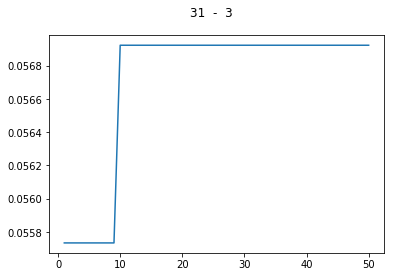

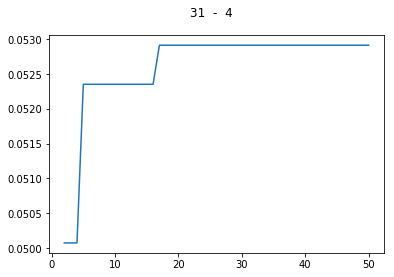

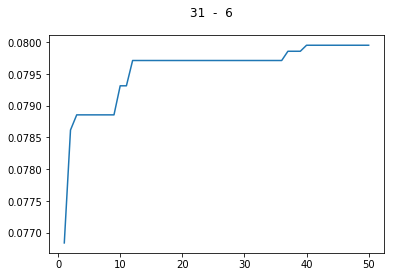

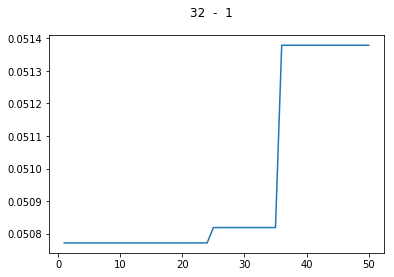

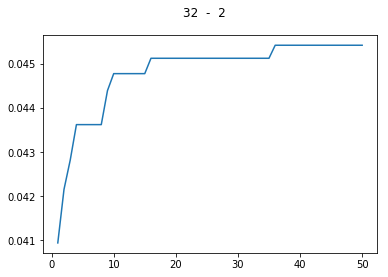

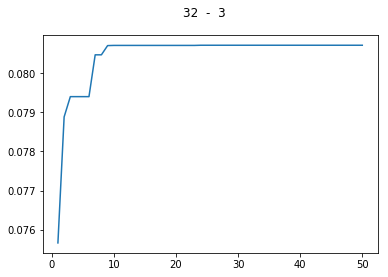

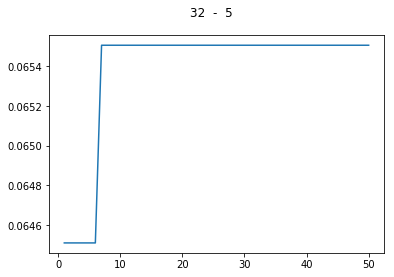

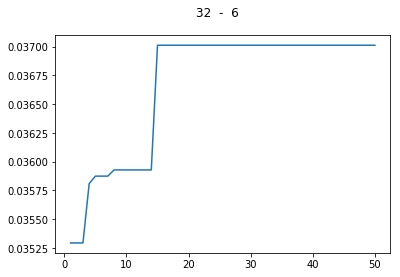

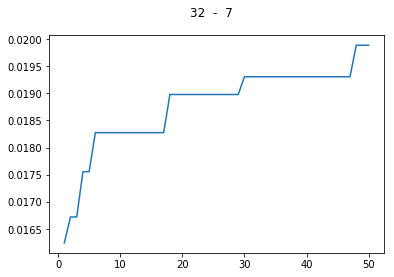

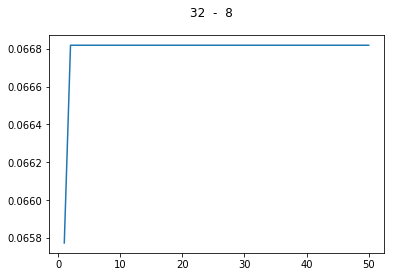

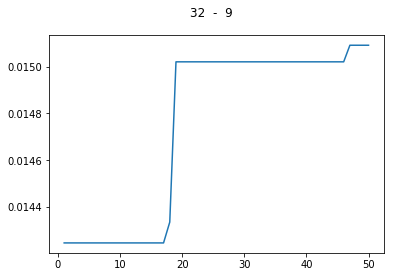

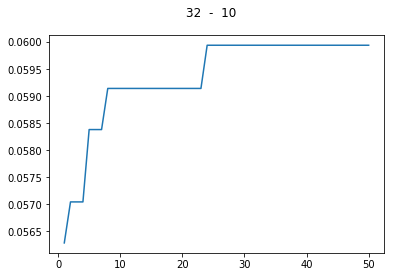

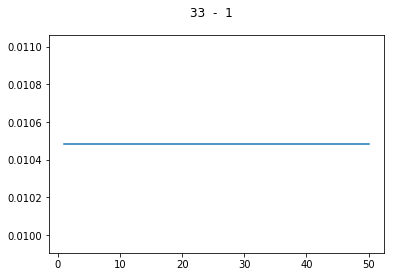

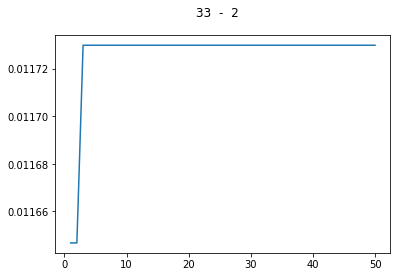

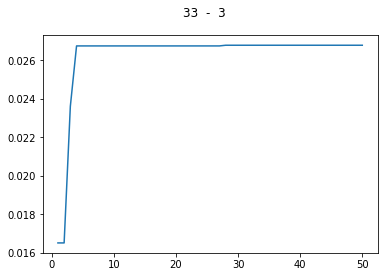

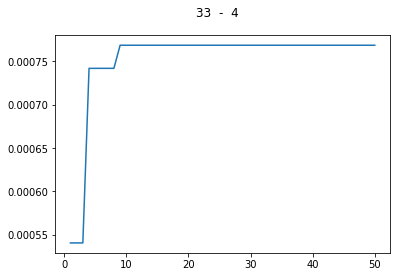

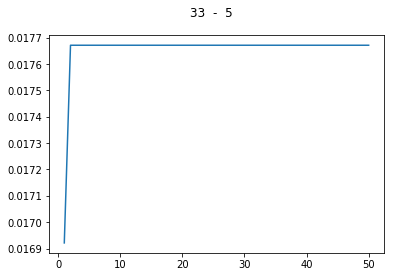

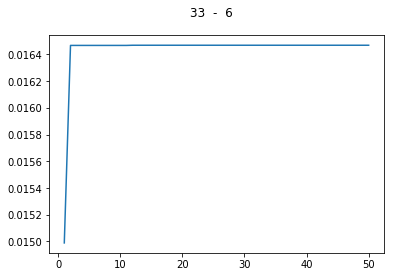

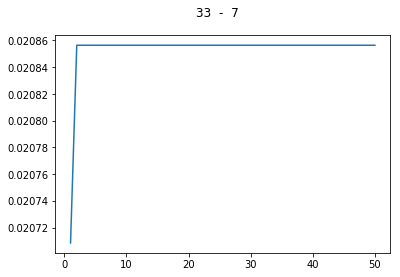

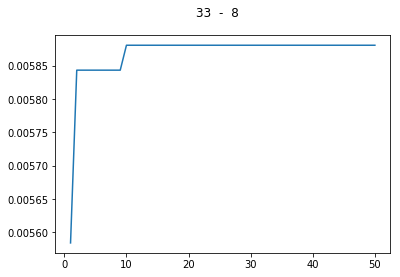

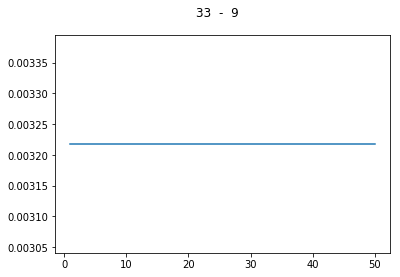

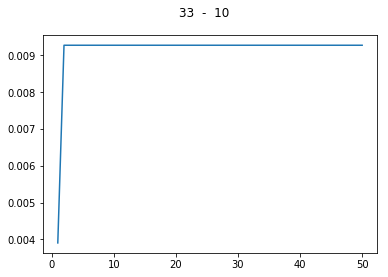

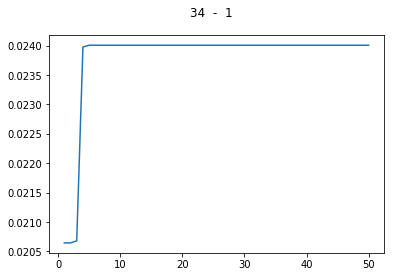

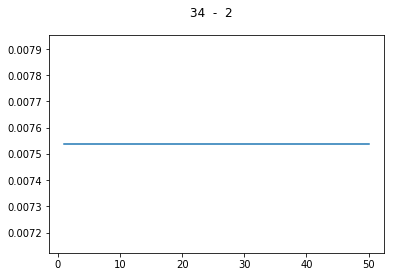

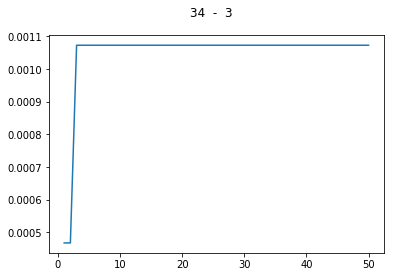

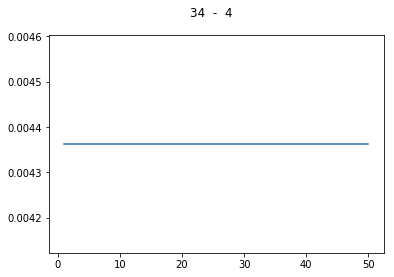

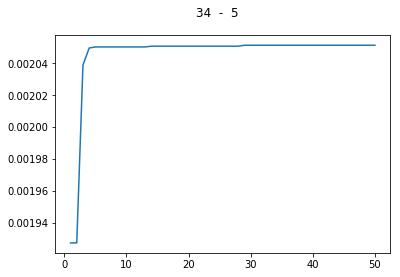

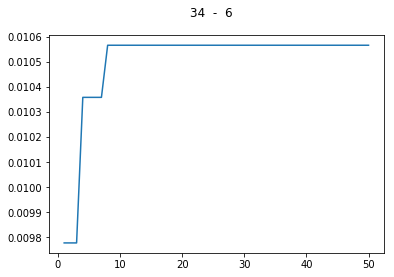

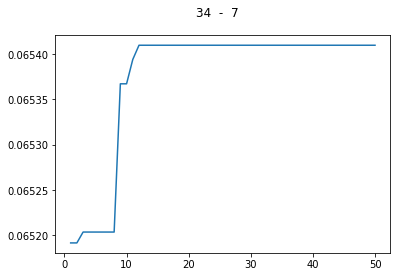

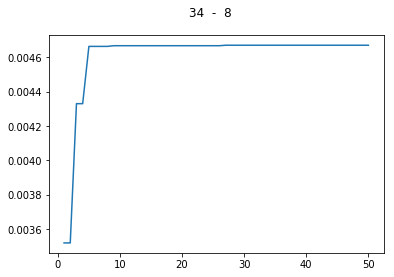

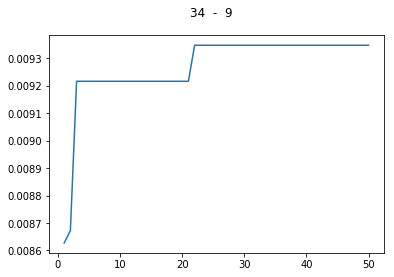

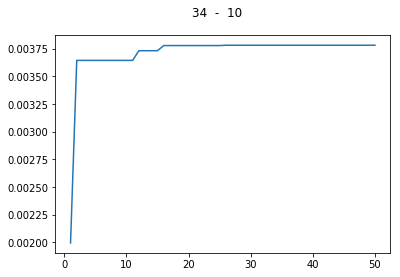

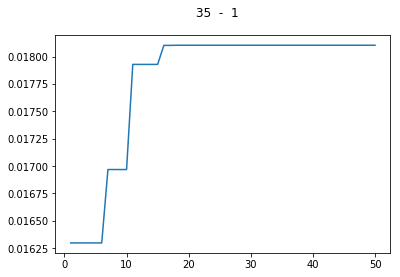

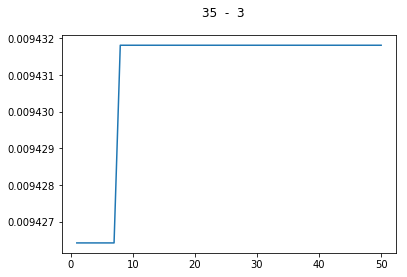

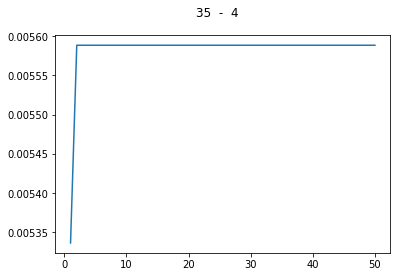

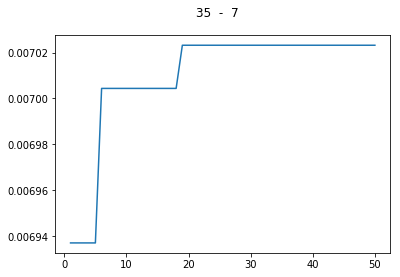

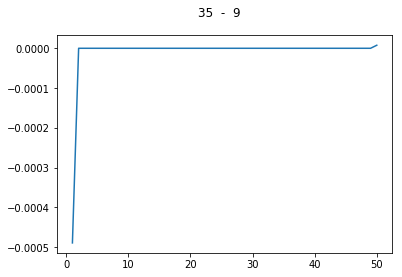

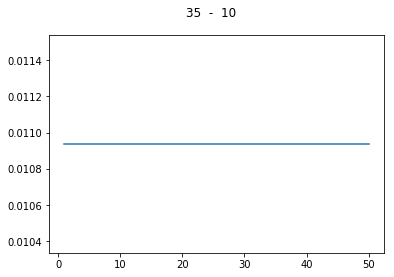

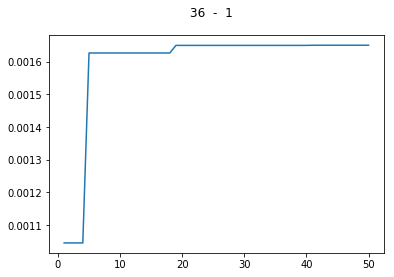

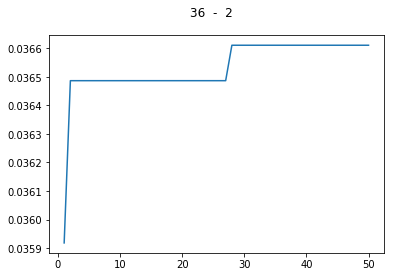

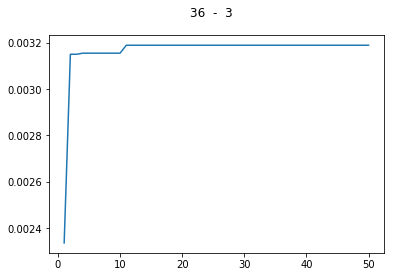

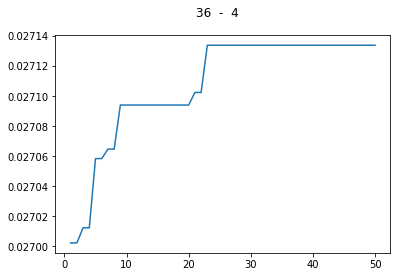

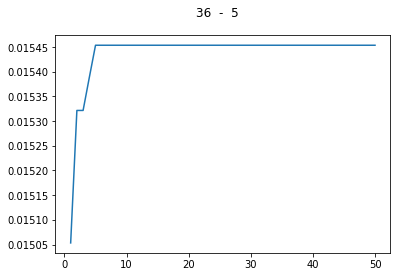

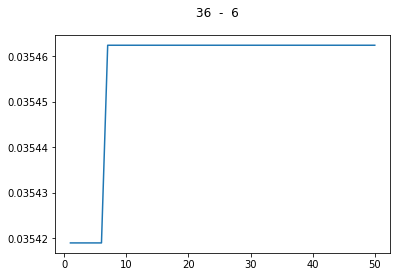

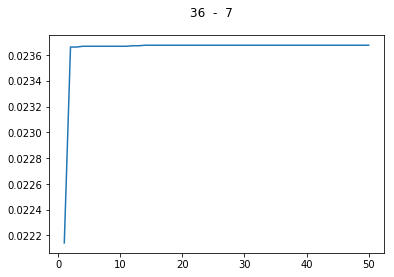

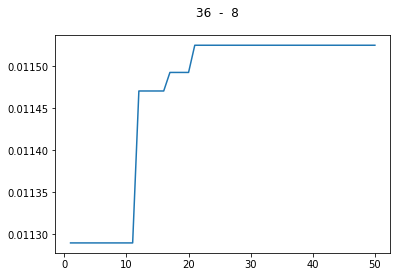

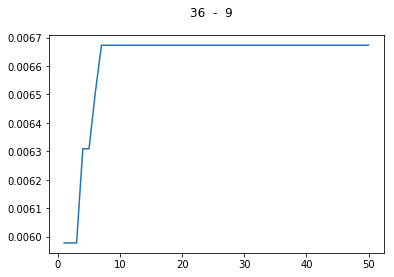

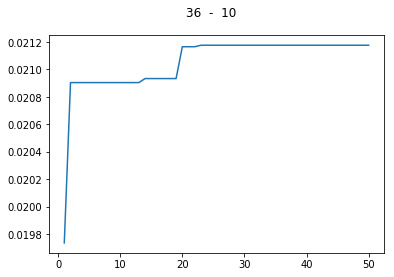

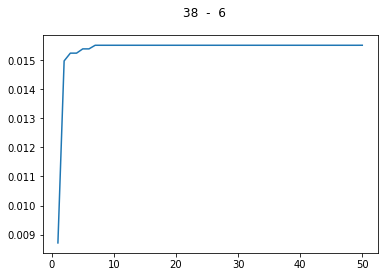

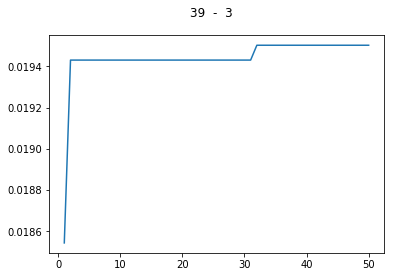

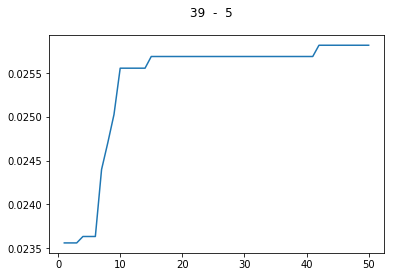

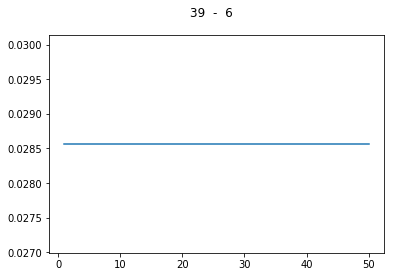

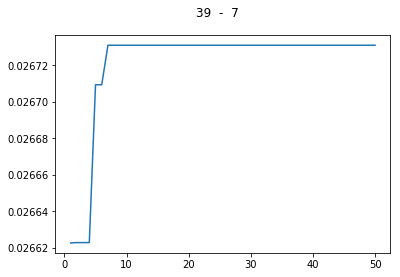

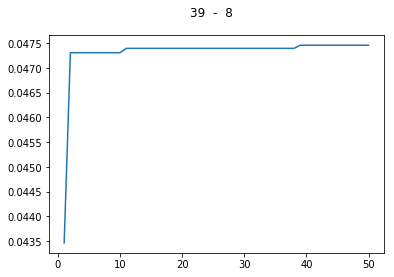

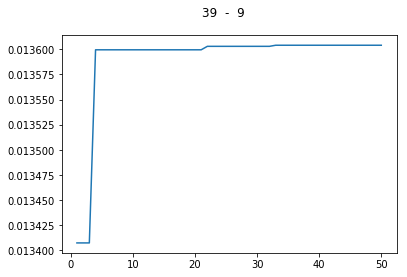

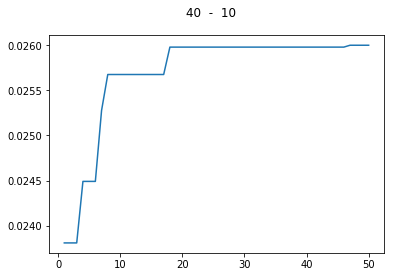

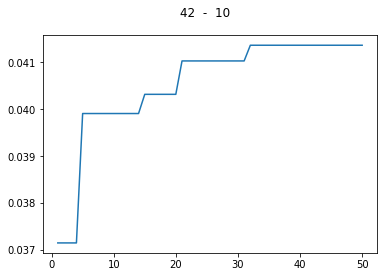

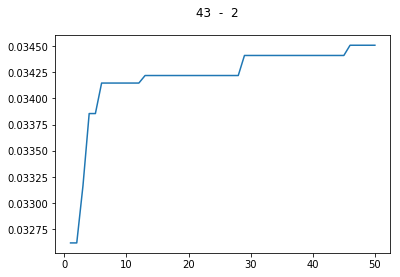

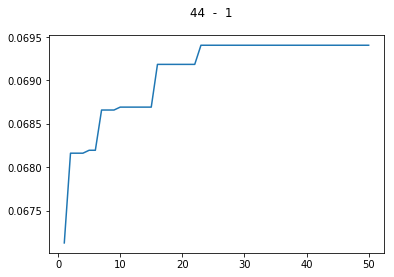

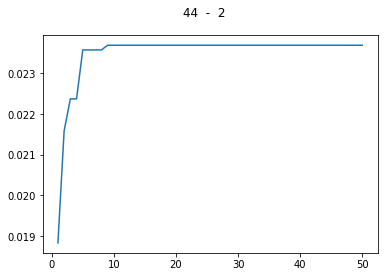

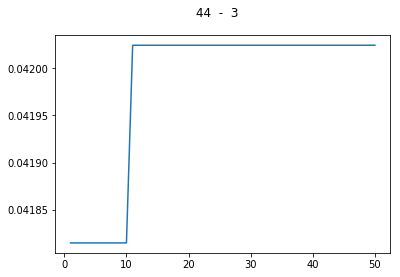

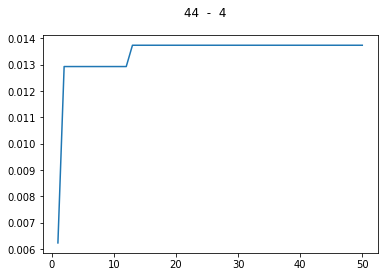

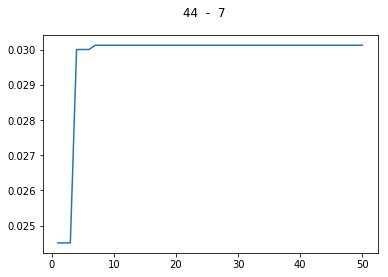

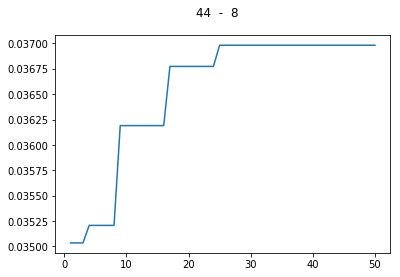

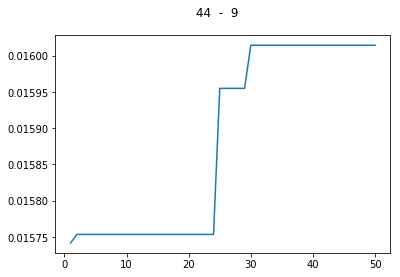

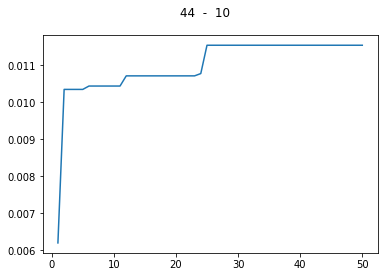

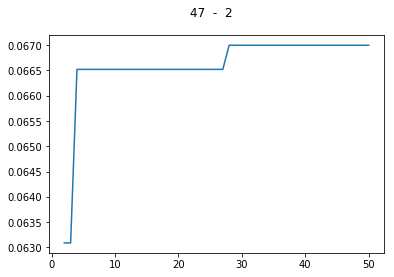

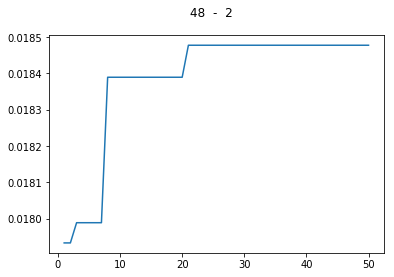

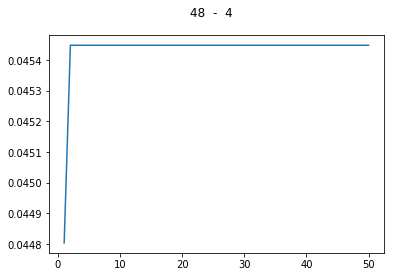

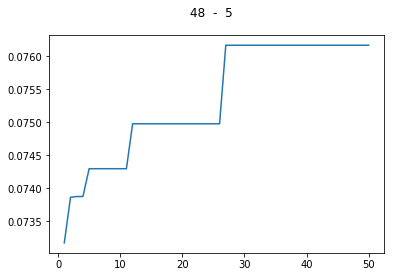

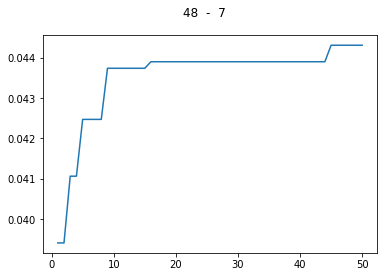

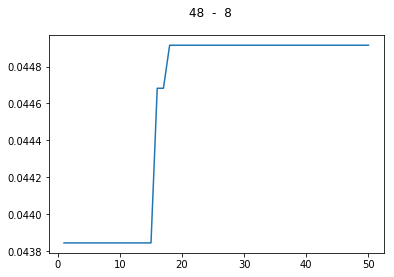

In [49]:
for k in d:
    total = {}
    fig = plt.figure()
    fig.suptitle('{}  -  {}'.format(*k))
    for c in range(1, 51):
        tmp = d[k][:c].min()
        total[c] = (d0[k] - tmp)/d0[k]
    plt.plot(total.keys(), total.values())
    plt.show()

In [151]:
par = {}
par[1] = [1.50, 0.25, 0.20]
par[2] = [1.50, 0.25, 0.50]
par[3] = [1.50, 0.25, 0.70]
par[4] = [1.50, 0.25, 1.00]
par[5] = [1.50, 0.50, 0.20]
par[6] = [1.50, 0.50, 0.50]
par[7] = [1.50, 0.50, 0.70]
par[8] = [1.50, 0.50, 1.00]
par[9] = [1.50, 0.75, 0.20]
par[10] = [1.50, 0.75, 0.50]
par[11] = [1.50, 0.75, 0.70]
par[12] = [1.50, 0.75, 1.00]
par[13] = [1.50, 1.00, 0.20]
par[14] = [1.50, 1.00, 0.50]
par[15] = [1.50, 1.00, 0.70]
par[16] = [1.50, 1.00, 1.00]
par[17] = [1.80, 0.25, 0.20]
par[18] = [1.80, 0.25, 0.50]
par[19] = [1.80, 0.25, 0.70]
par[20] = [1.80, 0.25, 1.00]
par[21] = [1.80, 0.50, 0.20]
par[22] = [1.80, 0.50, 0.50]
par[23] = [1.80, 0.50, 0.70]
par[24] = [1.80, 0.50, 1.00]
par[25] = [1.80, 0.75, 0.20]
par[26] = [1.80, 0.75, 0.50]
par[27] = [1.80, 0.75, 0.70]
par[28] = [1.80, 0.75, 1.00]
par[29] = [1.80, 1.00, 0.20]
par[30] = [1.80, 1.00, 0.50]
par[31] = [1.80, 1.00, 0.70]
par[32] = [1.80, 1.00, 1.00]
par[33] = [2.10, 0.25, 0.20]
par[34] = [2.10, 0.25, 0.50]
par[35] = [2.10, 0.25, 0.70]
par[36] = [2.10, 0.25, 1.00]
par[37] = [2.10, 0.50, 0.20]
par[38] = [2.10, 0.50, 0.50]
par[39] = [2.10, 0.50, 0.70]
par[40] = [2.10, 0.50, 1.00]
par[41] = [2.10, 0.75, 0.20]
par[42] = [2.10, 0.75, 0.50]
par[43] = [2.10, 0.75, 0.70]
par[44] = [2.10, 0.75, 1.00]
par[45] = [2.10, 1.00, 0.20]
par[46] = [2.10, 1.00, 0.50]
par[47] = [2.10, 1.00, 0.70]
par[48] = [2.10, 1.00, 1.00]

In [95]:
dfA = df.groupby(['i', 'j'], as_index = False).min()[['i', 'j', 0]]
dfA.columns = ['i', 'j', 'ASAA']
dfD = df0
dfD.columns = ['i', 'j', 'DET']
dfA['ASAA'] = pd.to_numeric(dfA['ASAA'])
dfM = pd.merge(dfA, dfD, on=['i', 'j'])

In [96]:
print(len(dfA))
dfA.head()

242


i  j       ASAA
0  1  1  45.528030
1  1  2  49.015069
2  1  3  48.054919
3  1  4  63.781310
4  1  5  40.645885

In [97]:
print(len(dfD))
dfD.head()

242


i  j        DET
0  1  1  46.783368
1  1  2  49.432265
2  1  3  48.780729
3  1  4  66.592510
4  1  5  40.892540

In [98]:
print(len(dfM))
dfM.head()

242


i  j       ASAA        DET
0  1  1  45.528030  46.783368
1  1  2  49.015069  49.432265
2  1  3  48.054919  48.780729
3  1  4  63.781310  66.592510
4  1  5  40.645885  40.892540

In [228]:
dfM

i   j       ASAA        DET      diff
0     1   1  45.528030  46.783368  0.026833
1     1   2  49.015069  49.432265  0.008440
2     1   3  48.054919  48.780729  0.014879
3     1   4  63.781310  66.592510  0.042215
4     1   5  40.645885  40.892540  0.006032
5     1   6  49.430353  51.214446  0.034836
6     1   7  60.352735  60.936499  0.009580
7     1   8  55.565390  56.768753  0.021198
8     1  10  47.427958  48.368485  0.019445
9     2   1  39.527109  41.346956  0.044014
10    2   2  52.590615  52.984514  0.007434
11    2   3  45.951334  46.472056  0.011205
12    2   4  43.369235  44.806949  0.032087
13    2   5  52.184087  55.232512  0.055193
14    2   6  47.264065  49.718636  0.049369
15    2   7  47.507712  47.841170  0.006970
16    2   9  55.403674  58.277282  0.049309
17    2  10  45.558571  45.611664  0.001164
18    3   1  74.058070  74.100229  0.000569
19    3   2  41.487999  43.718156  0.051012
20    3   3  57.189108  60.108511  0.048569
21    3   4  97.950195  98.599210  0.006582
22    3   5  53.739538  54.084503  0.006378
23    3   6  55.785258  56.516651  0.012941
24    3   7  48.173341  50.235269  0.041045
25    3   8  54.761137  54.981483  0.004008
26    3   9  65.298898  66.965924  0.024894
27    3  10  59.196366  60.378544  0.019579
28    4   1  49.718477  52.438671  0.051874
29    4   2  60.343408  61.570381  0.019928
..   ..  ..        ...        ...       ...
212  40   4  58.756893  61.478159  0.044264
213  40   5  66.859307  69.774881  0.041785
214  40   6  61.588005  62.902855  0.020903
215  40   7  47.749981  50.444204  0.053410
216  40   8  58.905632  60.921366  0.033087
217  40   9  65.356081  66.695684  0.020085
218  40  10  53.270908  54.692757  0.025997
219  42  10  75.713288  78.980026  0.041362
220  43   2  46.217086  47.868896  0.034507
221  44   1  50.240670  53.987706  0.069405
222  44   2  56.789062  58.167070  0.023691
223  44   3  52.003739  54.285028  0.042024
224  44   4  60.511547  61.354289  0.013736
225  44   5  57.245319  58.912791  0.028304
226  44   6  56.324802  59.640494  0.055595
227  44   7  44.797219  46.188469  0.030121
228  44   8  51.177568  53.142940  0.036983
229  44   9  64.604309  65.655742  0.016014
230  44  10  64.555909  65.309444  0.011538
231  47   2  59.624824  63.906280  0.066996
232  48   1  64.048876  64.354452  0.004748
233  48   2  54.490484  55.516276  0.018477
234  48   3  50.842530  52.254602  0.027023
235  48   4  58.165715  60.935107  0.045448
236  48   5  58.784210  63.630563  0.076164
237  48   6  58.620118  59.711949  0.018285
238  48   7  55.520306  58.094436  0.044309
239  48   8  46.105851  48.274108  0.044916
240  48   9  60.949199  63.881950  0.045909
241  48  10  55.917694  56.981912  0.018676

[242 rows x 5 columns]

In [235]:
dfM[dfM['diff']> 0.09]

i  j       ASAA        DET      diff
55  12  3  37.368461  41.347535  0.096235

In [100]:
dfM['diff'] = (dfM['DET'] - dfM['ASAA']) / dfM['DET']

In [105]:
a = np.array(list(dfM['diff']))

In [106]:
a.min()

7.645663588680676e-06

In [107]:
a.max()

0.09623484932603568

In [108]:
a.mean()

0.03190674439556501

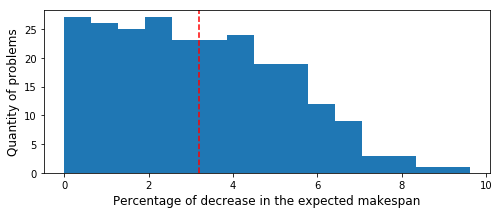

In [339]:
fig = plt.figure(figsize=(8,3))
plt.hist(a*100, bins=15)
plt.xlabel('Percentage of decrease in the expected makespan', fontsize=12)
plt.ylabel('Quantity of problems', fontsize=12)
plt.axvline(x=a.mean()*100, color='r', linestyle='--')
plt.show()

In [153]:
p = pd.DataFrame(par).T
p['i'] = p.index
p.columns = ['NC', 'RFR', 'RSR', 'i']

In [164]:
QQ = pd.merge(dfM, p, on=['i'])[['i', 'j', 'diff', 'NC', 'RFR', 'RSR']]

In [166]:
QQ.head()

i  j      diff   NC   RFR  RSR
0  1  1  0.026833  1.5  0.25  0.2
1  1  2  0.008440  1.5  0.25  0.2
2  1  3  0.014879  1.5  0.25  0.2
3  1  4  0.042215  1.5  0.25  0.2
4  1  5  0.006032  1.5  0.25  0.2

In [172]:
NC = QQ.groupby(['NC'], as_index=False).mean()[['NC', 'diff']]
RFR = QQ.groupby(['RFR'], as_index=False).mean()[['RFR', 'diff']]
RSR = QQ.groupby(['RSR'], as_index=False).mean()[['RSR', 'diff']]

In [173]:
NC

NC      diff
0  1.5  0.039634
1  1.8  0.030997
2  2.1  0.025967

In [174]:
RFR

RFR      diff
0  0.25  0.020004
1  0.50  0.039045
2  0.75  0.042554
3  1.00  0.049573

In [175]:
RSR

RSR      diff
0  0.2  0.014731
1  0.5  0.019883
2  0.7  0.030778
3  1.0  0.040070

In [251]:
fig = plt.figure()
for i in [0.25, 0.50, 0.75, 1.00]:
    q = QQ[QQ['RFR']==i].groupby(['RSR'], as_index=False).mean()[['RSR', 'diff']]
    fig.suptitle('(a)')
    plt.plot(q['RSR'], q['diff']*100, label='RFR = '+str(i))
    plt.scatter(q['RSR'], q['diff']*100, label=None)
    plt.xlabel('Network Complexity', fontsize=12)
    plt.ylabel('Percentage of decrease', fontsize=12)
    plt.legend()
plt.show()

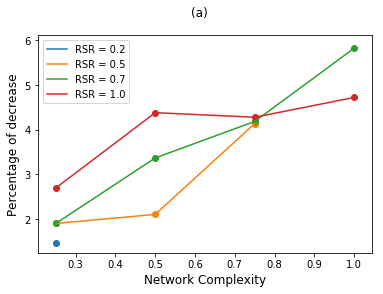

In [250]:
fig = plt.figure()
for i in [0.2, 0.5, 0.7, 1.0]:
    q = QQ[QQ['RSR']==i].groupby(['RFR'], as_index=False).mean()[['RFR', 'diff']]
    fig.suptitle('(a)')
    plt.plot(q['RFR'], q['diff']*100, label='RSR = '+str(i))
    plt.scatter(q['RFR'], q['diff']*100, label=None)
    plt.xlabel('Network Complexity', fontsize=12)
    plt.ylabel('Percentage of decrease', fontsize=12)
    plt.legend()
plt.show()

In [309]:
n2

NC      diff
0  1.5  0.049996
1  1.8  0.039880
2  2.1  0.030320

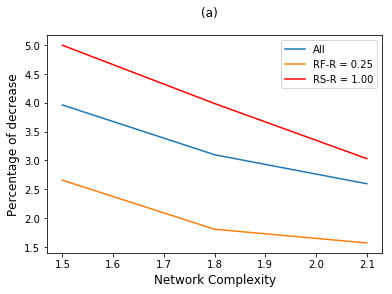

In [330]:
fig = plt.figure()
fig.suptitle('(a)')

n0 = QQ.groupby(['NC'], as_index=False).mean()[['NC', 'diff']]
plt.plot(n0['NC'], n0['diff']*100, label='All')

n1 = QQ[QQ['RFR']==0.25].groupby(['NC'], as_index=False).mean()[['NC', 'diff']]
plt.plot(n1['NC'], n1['diff']*100, label='RF-R = 0.25')

n2 = QQ[QQ['RSR']==1].groupby(['NC'], as_index=False).mean()[['NC', 'diff']]
plt.plot(n2['NC'], n2['diff']*100, label='RS-R = 1.00', color='r')

plt.xlabel('Network Complexity', fontsize=12)
plt.ylabel('Percentage of decrease', fontsize=12)
plt.legend()
plt.show()

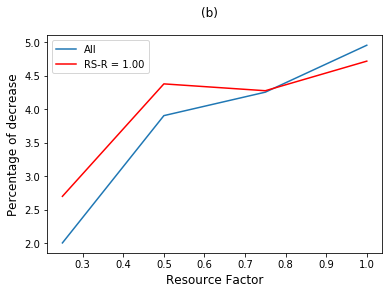

In [329]:
fig = plt.figure()
fig.suptitle('(b)')

r0 = QQ.groupby(['RFR'], as_index=False).mean()[['RFR', 'diff']]
plt.plot(r0['RFR'], r0['diff']*100, label='All')

r1 = QQ[QQ['RSR']==1].groupby(['RFR'], as_index=False).mean()[['RFR', 'diff']]
plt.plot(r1['RFR'], r1['diff']*100, label='RS-R = 1.00', color='r')

plt.xlabel('Resource Factor', fontsize=12)
plt.ylabel('Percentage of decrease', fontsize=12)
plt.legend()
plt.show()

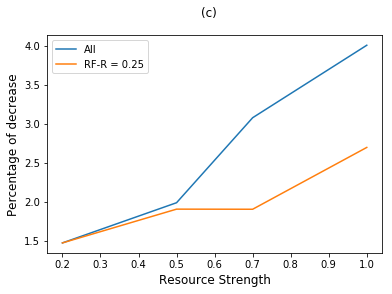

In [324]:
fig = plt.figure()
fig.suptitle('(c)')

r0 = QQ.groupby(['RSR'], as_index=False).mean()[['RSR', 'diff']]
plt.plot(r0['RSR'], r0['diff']*100, label='All')

r1 = QQ[QQ['RFR']==0.25].groupby(['RSR'], as_index=False).mean()[['RSR', 'diff']]
plt.plot(r1['RSR'], r1['diff']*100, label='RF-R = 0.25')

plt.xlabel('Resource Strength', fontsize=12)
plt.ylabel('Percentage of decrease', fontsize=12)
plt.legend()
plt.show()

In [206]:
QQ.groupby(['RFR', 'RSR'], as_index=False).mean()[['RFR', 'RSR', 'diff']]

RFR  RSR      diff
0   0.25  0.2  0.014731
1   0.25  0.5  0.019060
2   0.25  0.7  0.019047
3   0.25  1.0  0.026972
4   0.50  0.5  0.021076
5   0.50  0.7  0.033688
6   0.50  1.0  0.043793
7   0.75  0.5  0.041362
8   0.75  0.7  0.041829
9   0.75  1.0  0.042770
10  1.00  0.7  0.058192
11  1.00  1.0  0.047195

In [209]:
import seaborn as sns

In [291]:
aa = list(QQ[['RFR', 'RSR']].values)

In [294]:
bb = [(i[0], i[1]) for i in aa]

In [296]:
QQ['resources'] = bb

In [297]:
QQ.head()

i  j      diff   NC   RFR  RSR    resources
0  1  1  0.026833  1.5  0.25  0.2  (0.25, 0.2)
1  1  2  0.008440  1.5  0.25  0.2  (0.25, 0.2)
2  1  3  0.014879  1.5  0.25  0.2  (0.25, 0.2)
3  1  4  0.042215  1.5  0.25  0.2  (0.25, 0.2)
4  1  5  0.006032  1.5  0.25  0.2  (0.25, 0.2)

In [302]:
set(bb)

{(0.25, 0.2),
 (0.25, 0.5),
 (0.25, 0.7),
 (0.25, 1.0),
 (0.5, 0.5),
 (0.5, 0.7),
 (0.5, 1.0),
 (0.75, 0.5),
 (0.75, 0.7),
 (0.75, 1.0),
 (1.0, 0.7),
 (1.0, 1.0)}

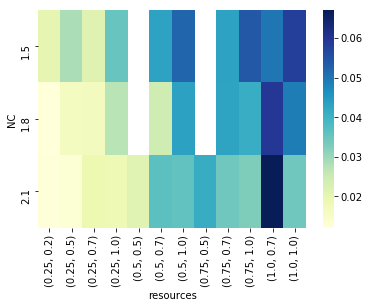

In [300]:
heatmap1_data = pd.pivot_table(QQ, values='diff', 
                     index=['NC'], 
                     columns='resources')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

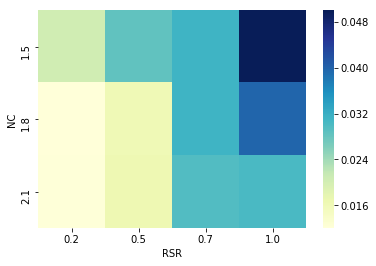

In [303]:
heatmap1_data = pd.pivot_table(QQ, values='diff', 
                     index=['NC'], 
                     columns='RSR')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

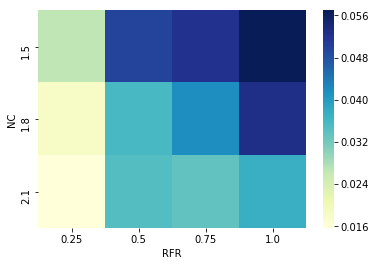

In [256]:
heatmap1_data = pd.pivot_table(QQ, values='diff', 
                     index=['NC'], 
                     columns='RFR')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

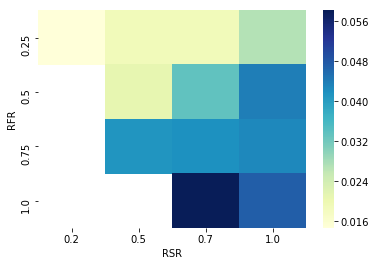

In [258]:
heatmap1_data = pd.pivot_table(QQ, values='diff', 
                     index=['RFR'], 
                     columns='RSR')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [343]:
QQ.groupby(['NC', 'RFR', 'RSR'], as_index=False).mean()[['NC', 'RFR', 'RSR', 'diff']]

NC   RFR  RSR      diff
0   1.5  0.25  0.2  0.020384
1   1.5  0.25  0.5  0.028527
2   1.5  0.25  0.7  0.021558
3   1.5  0.25  1.0  0.035419
4   1.5  0.50  0.7  0.043319
5   1.5  0.50  1.0  0.052035
6   1.5  0.75  0.7  0.043234
7   1.5  0.75  1.0  0.054234
8   1.5  1.00  0.7  0.050251
9   1.5  1.00  1.0  0.058296
10  1.8  0.25  0.2  0.012063
11  1.8  0.25  0.5  0.016320
12  1.8  0.25  0.7  0.016648
13  1.8  0.25  1.0  0.027241
14  1.8  0.50  0.7  0.024333
15  1.8  0.50  1.0  0.043421
16  1.8  0.75  0.7  0.042957
17  1.8  0.75  1.0  0.041177
18  1.8  1.00  0.7  0.059608
19  1.8  1.00  1.0  0.049083
20  2.1  0.25  0.2  0.012311
21  2.1  0.25  0.5  0.013280
22  2.1  0.25  0.7  0.018934
23  2.1  0.25  1.0  0.018255
24  2.1  0.50  0.5  0.021076
25  2.1  0.50  0.7  0.036412
26  2.1  0.50  1.0  0.035887
27  2.1  0.75  0.5  0.041362
28  2.1  0.75  0.7  0.034507
29  2.1  0.75  1.0  0.032741
30  2.1  1.00  0.7  0.066996
31  2.1  1.00  1.0  0.034396

In [347]:
QQ[QQ['i'] == 33]

i   j      diff   NC   RFR  RSR    resources
157  33   1  0.010483  2.1  0.25  0.2  (0.25, 0.2)
158  33   2  0.011730  2.1  0.25  0.2  (0.25, 0.2)
159  33   3  0.026771  2.1  0.25  0.2  (0.25, 0.2)
160  33   4  0.000769  2.1  0.25  0.2  (0.25, 0.2)
161  33   5  0.017671  2.1  0.25  0.2  (0.25, 0.2)
162  33   6  0.016468  2.1  0.25  0.2  (0.25, 0.2)
163  33   7  0.020856  2.1  0.25  0.2  (0.25, 0.2)
164  33   8  0.005881  2.1  0.25  0.2  (0.25, 0.2)
165  33   9  0.003218  2.1  0.25  0.2  (0.25, 0.2)
166  33  10  0.009264  2.1  0.25  0.2  (0.25, 0.2)

In [ ]:
16-1   1.5, 1.00, 1.00
20-1   1.8, 0.25, 1.00
33-1   2.1, 0.25, 0.20